# Part 1: 

### Overall implementation of this part is that we will run all of the algorithm require includings: 
#### We print and plot the performance of the algorithm the average reward acquired by the algorithm at each time step at each time step and the percentage of time the optimal action is taken by the algorithm.

<ul>1. Greedy with non-optimistic</ul>
<ul>2. Epsilon-greedy with different choices of epsilon.</ul>
<ul>3. Optimistic starting values with a greedy approach</ul>
<ul>4. Gradient bandit algorithm</ul>


In [208]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [209]:
# np.random.seed(777)

K_ARM = 10
BANDIT_PROBLEMS = 1000
STEP1 = 1000 
STEP2 = 5000 

Q_STAR = np.random.normal(0, 1, (BANDIT_PROBLEMS,K_ARM))
arms = [0] * K_ARM

for i in range(10):
    arms[i] = np.random.normal(Q_STAR [0, i], 1, 1000) # first problem as a sample

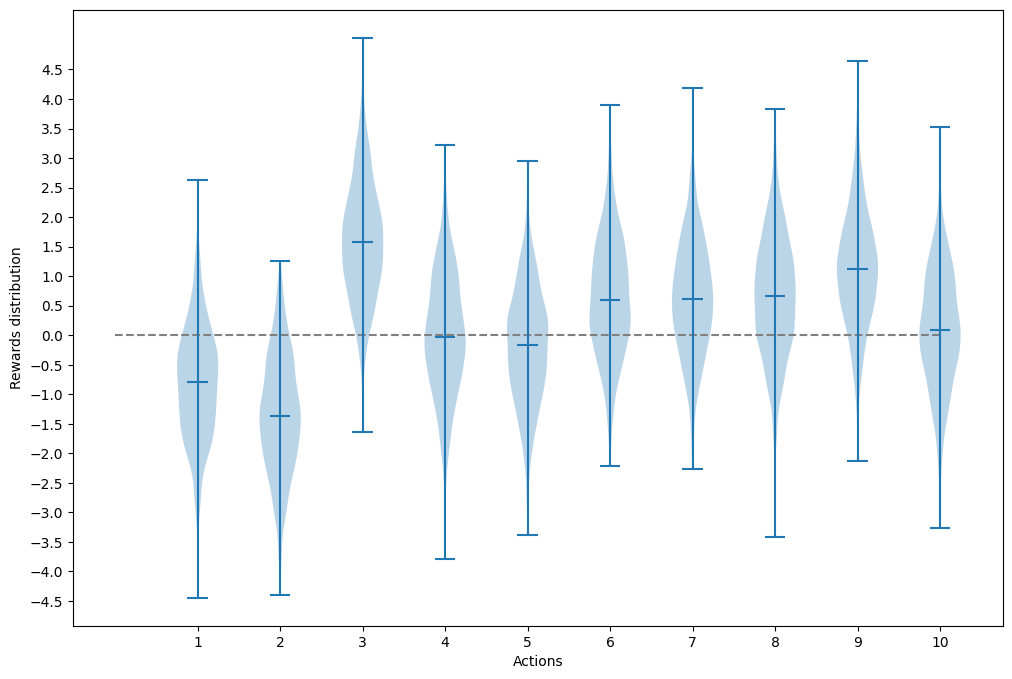

In [210]:
plt.figure(figsize=(12,8))
plt.ylabel('Rewards distribution')
plt.plot([0,10],[0,0], color='gray', linestyle='--')

plt.xlabel('Actions')
plt.xticks(range(1,11))
plt.yticks(np.arange(-5,5,0.5))

plt.violinplot(arms, positions=range(1,11), showmedians=True)
plt.show()

In [211]:
def bandit(action, bandit_problem):
    init_reward_est = np.random.normal(Q_STAR[bandit_problem, action], 1)
    return init_reward_est
def get_max(Q):

    # max_value_indices =  np.ravel(Q==np.max(Q))
    max_value_indices = np.where(Q == np.max(Q))[0]
    if len(max_value_indices) > 1: 

        best_action = np.random.choice(max_value_indices) # Find indices of maximum Q-values
    else:
        best_action = max_value_indices[0]

    return best_action

def greedy_algorithm(k_arm=K_ARM, epsilon=0, steps=STEP1, initial_value=0,alpha=0,bandit_problems =BANDIT_PROBLEMS):
    """
    Runs the epsilon-greedy algorithm with a given number of steps and initial value.
    
    Parameters:
    k_arm (int): Number of arms default = K_ARM = 10 .
    epsilon (float): Probability of exploration, default is 0.
    steps (int): Number of steps, default is STEP1 = 1000.
    initial_value (float): Initial value for Q.
    alpha (float): Step size parameter., default = 0 
    bandit_problems (int): Number of bandit problems, default = BANDIT_PROBLEM = 1000.
    
    Returns:
    tuple: Average reward and optimal action proportion.

    """
    rewards = np.zeros(steps)
    actions = np.zeros(steps)
    
    for i in range(bandit_problems):
        # Initialize Q-values and number of rewards given
        Q = np.ones(k_arm) * initial_value # initial Q
        N = np.zeros(k_arm)  
        best_action = np.argmax(Q_STAR[i]) # Find the best action based on the true means
        for step in range(steps):
            if np.random.rand() < epsilon: # Exploration
                selected_action  = np.random.randint(k_arm)
            else: # Exploitation
                selected_action = get_max(Q)

            # Get the reward for the selected action
            reward = bandit(selected_action, i)

            # Update the count and Q-value for the selected action
            N[selected_action] += 1
            if alpha > 0:
                Q[selected_action] += (reward - Q[selected_action]) * alpha
            else:
                Q[selected_action] += (reward - Q[selected_action]) / N[selected_action]

            # Accumulate the reward
            rewards [step] += reward
            
            # Track if the selected action is the best action
            if selected_action == best_action:
                actions[step] += 1
    # Calculate the average reward and the proportion of optimal actions
    avg_reward = rewards/bandit_problems
    optimal_action = actions/bandit_problems
    
    return avg_reward, optimal_action



## Non optimistic greedy 

###  The performance of the greedy with non-optimistic initial values algorithm.
#### The initial action value estimates =  0 and is applied with the use of the incremental implementation of the simple average method.
#### Always choose the action that currently has the highest estimated value. This means 𝜖 = 0 so there is no exploration, only exploitation

Average reward for epsilon = 0.0: 0.9996604383833698
Optimal Percentage for epsilon = 0.0: 33.852000000000004 %
--------------------------------------



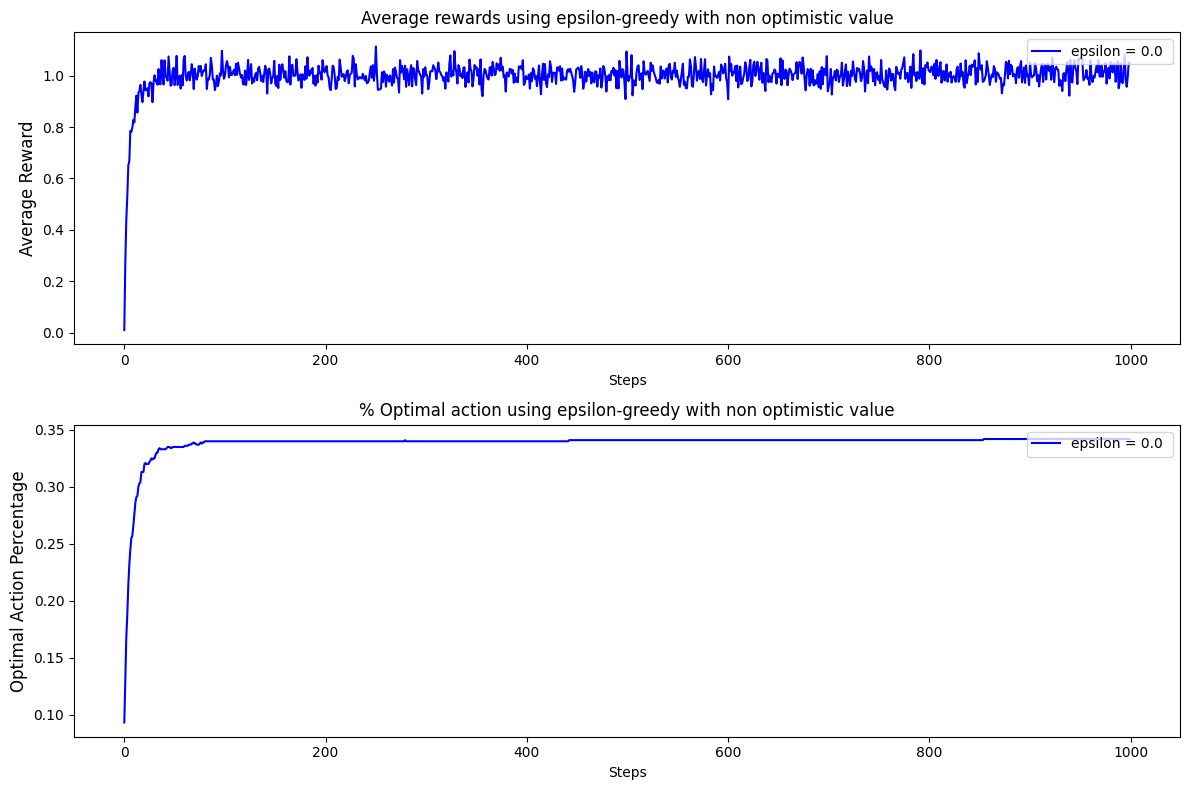

In [212]:
avg_reward_p1,optimal_percentages_p1 = greedy_algorithm(k_arm = K_ARM, epsilon= 0.0, steps=STEP1, initial_value =0 ,alpha=0,bandit_problems =BANDIT_PROBLEMS)
fig, axs = plt.subplots(2, 1, figsize=(12, 8)) 
axs[0].set_title("Average rewards using epsilon-greedy with non optimistic value")
axs[0].plot(np.arange(STEP1), avg_reward_p1, label='epsilon = 0.0 ', color='b')
axs[0].set_xlabel('Steps')
axs[0].set_ylabel('Average Reward',size ='large')
axs[0].legend(loc='upper right')

axs[1].set_title("% Optimal action using epsilon-greedy with non optimistic value")
axs[1].plot(np.arange(STEP1), optimal_percentages_p1, label='epsilon = 0.0 ', color='b')
axs[1].set_xlabel('Steps')
axs[1].set_ylabel('Optimal Action Percentage', size ='large')
axs[1].legend(loc='upper right')
fig.tight_layout()

avg_reward_over_time = np.average(avg_reward_p1)
print(f'Average reward for epsilon = {0.0}: {avg_reward_over_time}')
optimal_percentages_over_time = np.average(optimal_percentages_p1)
print(f'Optimal Percentage for epsilon = {0.0}: {optimal_percentages_over_time*100} %')
print("--------------------------------------\n")

## Greedy epsilon with different choices of epsilon

#### We test the epsilon greedy algorithm with 6 different epsilon values, The code tests multiple values of 𝜖 in list of [0.0, 0.01, 0.05, 0.1, 0.5, 0.9] then observe their impact on the average reward and optimal action percentages.
#### Tracking Performance: The results of each epsilon value are plotted to visualize the evolution of the average rewards and the percentage of optimal actions over time.
#### Support analysis of results, we print the average rewards and optimal action percentages for each 𝜖 and the code helps identify which 𝜖 value provides the best balance between exploration and exploitation. The choice of epsilon will be explained in detail in the report

Average reward Over Time for epsilon = 0.0: 1.014911685912906
Average Optimal Percentage Over Time for epsilon = 0.0: 34.7443 %
--------------------------------------

Average reward Over Time for epsilon = 0.01: 1.1778651026162694
Average Optimal Percentage Over Time for epsilon = 0.01: 48.75299999999999 %
--------------------------------------

Average reward Over Time for epsilon = 0.1: 1.2963723417656279
Average Optimal Percentage Over Time for epsilon = 0.1: 69.0577 %
--------------------------------------

Average reward Over Time for epsilon = 0.25: 1.1069254669125084
Average Optimal Percentage Over Time for epsilon = 0.25: 65.0336 %
--------------------------------------

Average reward Over Time for epsilon = 0.5: 0.7416705627367757
Average Optimal Percentage Over Time for epsilon = 0.5: 47.861200000000004 %
--------------------------------------

Average reward Over Time for epsilon = 0.9: 0.147263418391844
Average Optimal Percentage Over Time for epsilon = 0.9: 17.5416 %
---

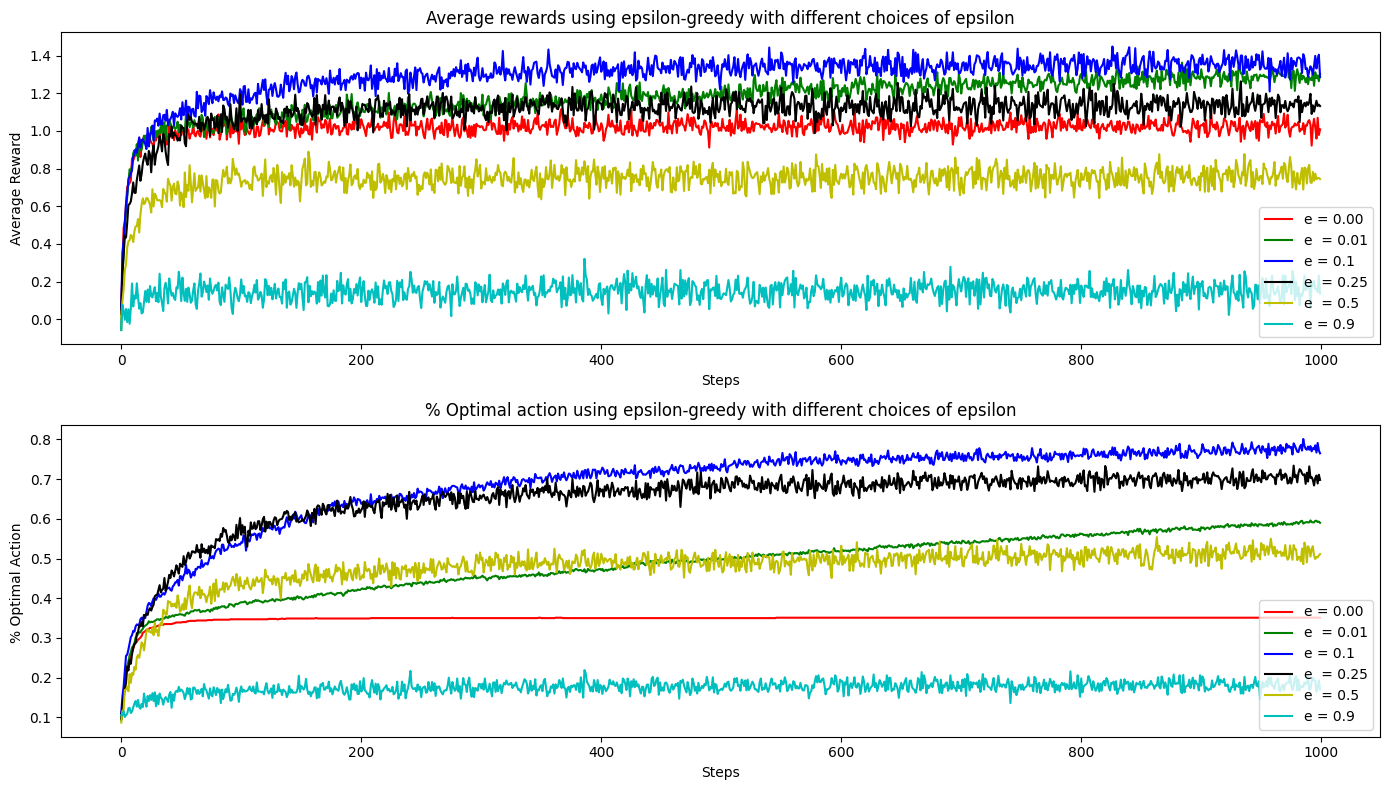

In [224]:
# steps =1000

colors = ['r', 'g', 'b', 'k', 'y', 'c', 'm']
epsilon_list = [0.0,0.01,0.1,0.25,0.5,0.9]
labels = ['e = 0.00','e  = 0.01','e = 0.1', 'e  = 0.25', 'e  = 0.5','e = 0.9']

plt.figure(figsize=(14, 8))

# Plot the average rewards and optimal action percentages
for index, eps in enumerate(epsilon_list):
    avg_reward,optimal_percentages = greedy_algorithm(k_arm=10,epsilon=eps,steps=STEP1,initial_value=0,bandit_problems=BANDIT_PROBLEMS)

    # Plot average rewards
    plt.subplot(2, 1, 1)
    plt.title("Average rewards using epsilon-greedy with different choices of epsilon")
    plt.plot(np.arange(STEP1), avg_reward, label=labels[index], color=colors[index])
    plt.xlabel('Steps')
    plt.ylabel('Average Reward',size = 'medium')
    plt.legend(loc='lower right')

    
    # Plot optimal action percentages
    plt.subplot(2, 1, 2)
    plt.title("% Optimal action using epsilon-greedy with different choices of epsilon")

    plt.plot(np.arange(STEP1), optimal_percentages, label=labels[index], color=colors[index])
    plt.xlabel('Steps')
    plt.ylabel('% Optimal Action ',size='medium')
    plt.legend(loc='lower right')
    avg_reward_over_time = np.average(avg_reward)
    print(f'Average reward Over Time for epsilon = {eps}: {avg_reward_over_time}')
    optimal_percentages_over_time = np.average(optimal_percentages)
    print(f'Average Optimal Percentage Over Time for epsilon = {eps}: {optimal_percentages_over_time*100} %')
    print("--------------------------------------\n")
    
    

plt.tight_layout()
plt.show()


### Run 5000 steps

Average reward Over Time for epsilon = 0.0: 1.0210363321350941
Average Optimal Percentage Over Time for epsilon = 0.0: 35.72642000000001 %
--------------------------------------

Average reward Over Time for epsilon = 0.01: 1.3714428107424719
Average Optimal Percentage Over Time for epsilon = 0.01: 67.3399 %
--------------------------------------

Average reward Over Time for epsilon = 0.1: 1.3517365509895054
Average Optimal Percentage Over Time for epsilon = 0.1: 80.75862 %
--------------------------------------

Average reward Over Time for epsilon = 0.25: 1.1355602922254864
Average Optimal Percentage Over Time for epsilon = 0.25: 71.6591 %
--------------------------------------

Average reward Over Time for epsilon = 0.5: 0.7595180091266438
Average Optimal Percentage Over Time for epsilon = 0.5: 51.69834000000001 %
--------------------------------------

Average reward Over Time for epsilon = 0.9: 0.15021146462953194
Average Optimal Percentage Over Time for epsilon = 0.9: 18.36406 %

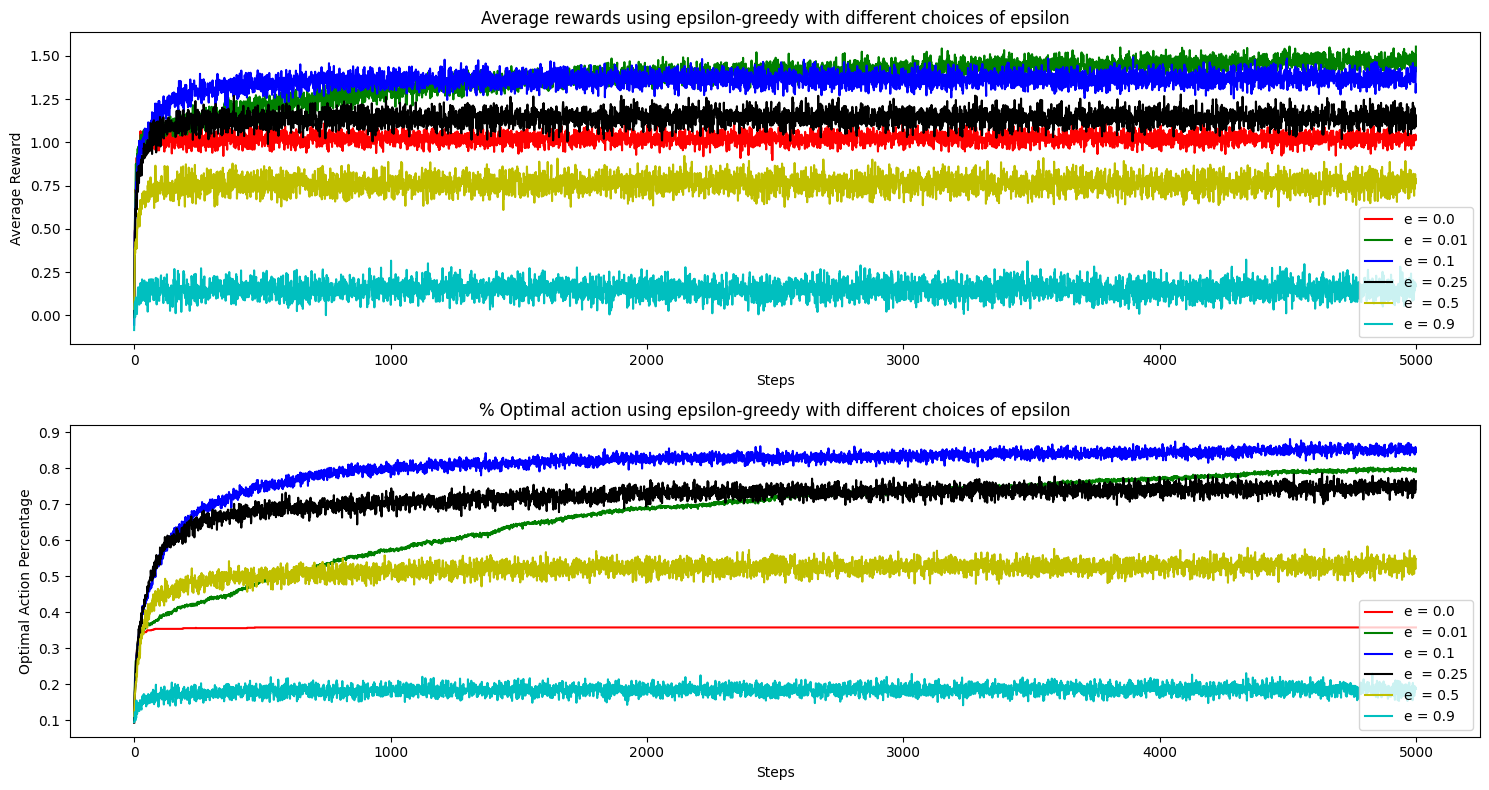

In [225]:
# steps =1000

colors = ['r', 'g', 'b', 'k', 'y', 'c', 'm']
epsilon_list = [0.0,0.01,0.1,0.25,0.5,0.9]
labels = ['e = 0.0','e  = 0.01','e = 0.1', 'e  = 0.25', 'e  = 0.5','e = 0.9']

plt.figure(figsize=(15, 8))

# Plot the average rewards and optimal action percentages
for index, eps in enumerate(epsilon_list):
    avg_reward,optimal_percentages = greedy_algorithm(k_arm=10,epsilon=eps,steps=STEP2,initial_value=0,bandit_problems=1000)
 
    
    # Plot average rewards
    plt.subplot(2, 1, 1)
    plt.title("Average rewards using epsilon-greedy with different choices of epsilon")
    plt.plot(np.arange(STEP2), avg_reward, label=labels[index], color=colors[index])
    plt.xlabel('Steps')
    plt.ylabel('Average Reward',size = 'medium')
    plt.legend(loc='lower right')

    
    # Plot optimal action percentages
    plt.subplot(2, 1, 2)
    plt.title("% Optimal action using epsilon-greedy with different choices of epsilon")

    plt.plot(np.arange(STEP2), optimal_percentages, label=labels[index], color=colors[index])
    plt.xlabel('Steps')
    plt.ylabel('Optimal Action Percentage',size='medium')
    plt.legend(loc='lower right')
    avg_reward_over_time = np.average(avg_reward)
    print(f'Average reward Over Time for epsilon = {eps}: {avg_reward_over_time}')
    optimal_percentages_over_time = np.average(optimal_percentages)
    print(f'Average Optimal Percentage Over Time for epsilon = {eps}: {optimal_percentages_over_time*100} %')
    print("--------------------------------------\n")
    
    

plt.tight_layout()
plt.show()


## Optimistic initial value

### Pilot run to find the most suitable value. Assuming the mean will be near 1 with margin of 0.5. 1.0, 1.5

Average reward Over Time for initial optimistic values = 1: 1.397249157199624
Optimal Percentage Over Time for initial optimistic values = 1: 71.042 %
--------------------------------------

Average reward Over Time for initial optimistic values = 2: 1.3805924779783718
Optimal Percentage Over Time for initial optimistic values = 2: 68.97699999999999 %
--------------------------------------

Average reward Over Time for initial optimistic values = 3: 1.4549743788532707
Optimal Percentage Over Time for initial optimistic values = 3: 75.91799999999999 %
--------------------------------------

Average reward Over Time for initial optimistic values = 4: 1.3710274625350691
Optimal Percentage Over Time for initial optimistic values = 4: 68.81599999999999 %
--------------------------------------

Average reward Over Time for initial optimistic values = 5: 1.3458232063059554
Optimal Percentage Over Time for initial optimistic values = 5: 61.84400000000001 %
-------------------------------------

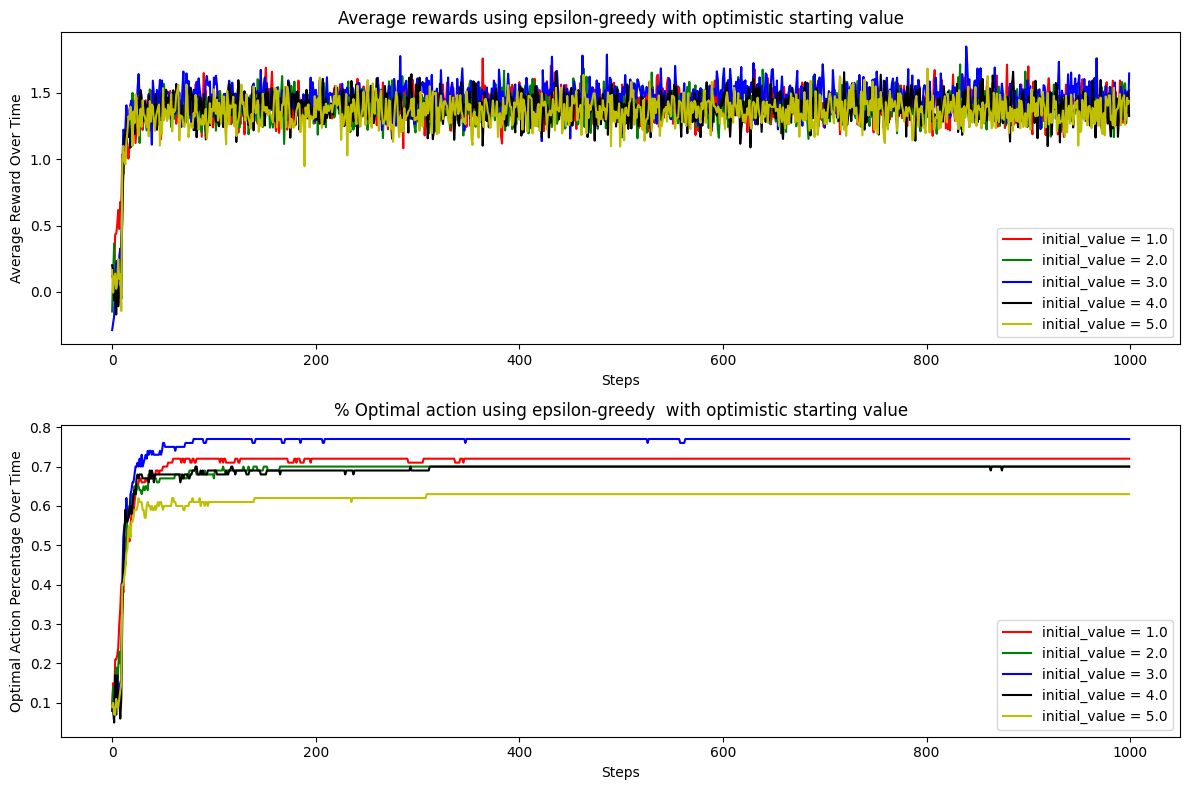

In [239]:
colors = ['r', 'g', 'b', 'k', 'y', 'c', 'm']
init_values = [1,2,3,4, 5]
labels = ['initial_value = 1.0', 'initial_value = 2.0','initial_value = 3.0','initial_value = 4.0','initial_value = 5.0']

# labels = ['initial_value = 1.0', 'initial_value = 1.5','initial_value = 2.0','initial_value = 2.5','initial_value = 3','initial_value = 5']
plt.figure(figsize=(12, 8))

# Plot the average rewards and optimal action percentages
for index, init_val in enumerate(init_values):
    avg_reward,optimal_percentages = greedy_algorithm(k_arm=10,epsilon=0.00,steps=STEP1,initial_value=init_val,bandit_problems=100,alpha=0.0)
    
    
    # Plot average rewards
    plt.subplot(2, 1, 1)
    plt.title("Average rewards using epsilon-greedy with optimistic starting value")
    plt.plot(np.arange(STEP1), avg_reward, label=labels[index], color=colors[index])
    plt.xlabel('Steps')
    plt.ylabel('Average Reward Over Time',size = 'medium')
    plt.legend(loc='lower right')

    
    # Plot optimal action percentages
    plt.subplot(2, 1, 2)
    plt.title("% Optimal action using epsilon-greedy  with optimistic starting value")

    plt.plot(np.arange(STEP1), optimal_percentages, label=labels[index], color=colors[index])
    plt.xlabel('Steps')
    plt.ylabel('Optimal Action Percentage Over Time',size='medium')
    plt.legend(loc='lower right')
    avg_reward_over_time = np.average(avg_reward)
    print(f'Average reward over time for initial optimistic values = {init_val}: {avg_reward_over_time}')
    optimal_percentages_over_time = np.average(optimal_percentages)
    print(f'Optimal Percentage over time for initial optimistic values = {init_val}: {optimal_percentages_over_time*100} %')
    print("--------------------------------------\n")
    
    

plt.tight_layout()
plt.show()


### Optimistic value give the best average rewards and highest optimal percentages, initial optimistic value = 3. 

Average reward over time for alpha = 0.0: 1.3869680002110327
Optimal Percentage over time for alpha = 0.0: 67.26500000000001 %
--------------------------------------

Average reward over time for alpha = 0.01: 0.7541172868982257
Optimal Percentage over time for alpha = 0.01: 37.07939999999999 %
--------------------------------------

Average reward over time for alpha = 0.1: 1.3499166188615426
Optimal Percentage over time for alpha = 0.1: 74.7594 %
--------------------------------------

Average reward over time for alpha = 0.2: 1.385204739156664
Optimal Percentage over time for alpha = 0.2: 74.1577 %
--------------------------------------

Average reward over time for alpha = 0.5: 1.3682310530604478
Optimal Percentage over time for alpha = 0.5: 68.6608 %
--------------------------------------

Average reward over time for alpha = 0.9: 1.2896781789772767
Optimal Percentage over time for alpha = 0.9: 60.551100000000005 %
--------------------------------------



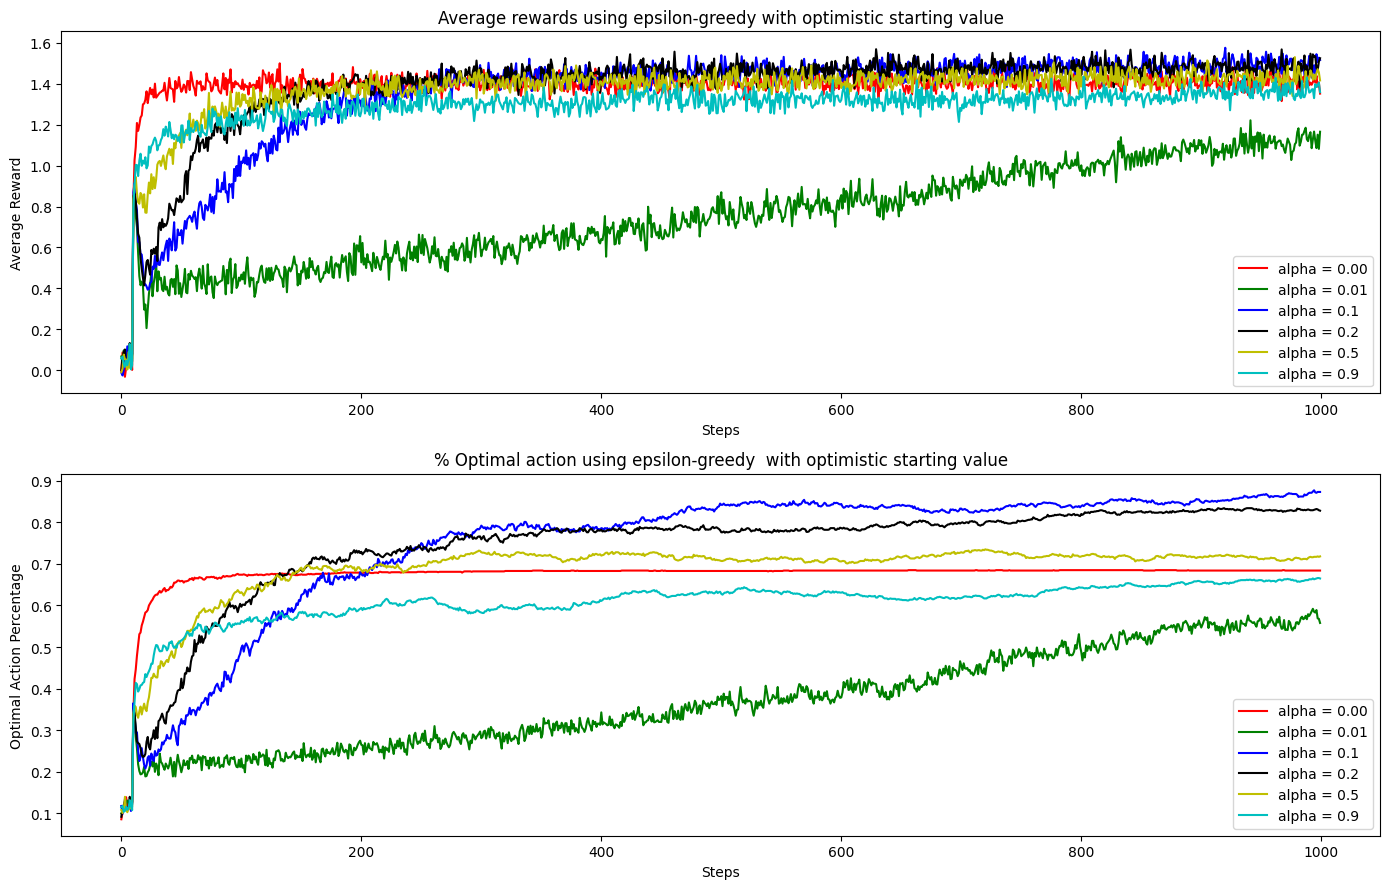

In [253]:
colors = ['r', 'g', 'b', 'k', 'y', 'c', 'm']
alpha_list = [0.0,0.01,0.1,0.2,0.5,0.9]
chosen_initial_Q = 3
labels = ['alpha = 0.00', 'alpha = 0.01','alpha = 0.1', 'alpha = 0.2','alpha = 0.5','alpha = 0.9']
plt.figure(figsize=(14, 9))

# Plot the average rewards and optimal action percentages
for index, alpha in enumerate(alpha_list):
    avg_reward,optimal_percentages = greedy_algorithm(k_arm=10,epsilon=0,steps=STEP1,initial_value=chosen_initial_Q ,bandit_problems=1000,alpha=alpha)
 
    
    # Plot average rewards
    plt.subplot(2, 1, 1)
    plt.title("Average rewards using epsilon-greedy with optimistic starting value")
    plt.plot(np.arange(STEP1), avg_reward, label=labels[index], color=colors[index])
    plt.xlabel('Steps')
    plt.ylabel('Average Reward',size = 'medium')
    plt.legend(loc='lower right')


    
    # Plot optimal action percentages
    plt.subplot(2, 1, 2)
    plt.title("% Optimal action using epsilon-greedy  with optimistic starting value")

    plt.plot(np.arange(STEP1), optimal_percentages, label=labels[index], color=colors[index])
    plt.xlabel('Steps')
    plt.ylabel('Optimal Action Percentage',size='medium')
    plt.legend(loc='lower right')
    avg_reward_over_time = np.average(avg_reward)
    print(f'Average reward over time for alpha = {alpha}: {avg_reward_over_time}')
    optimal_percentages_over_time = np.average(optimal_percentages)
    print(f'Optimal Percentage over time for alpha = {alpha}: {optimal_percentages_over_time*100} %')
    print("--------------------------------------\n")
    
    

plt.tight_layout()
plt.show()


#### RUN 5000 STEPS

Average reward over time for alpha = 0.0: 1.4023698613324016
Optimal Percentage over time for alpha = 0.0: 67.76342 %
--------------------------------------

Average reward over time for alpha = 0.01: 1.3219494174403565
Optimal Percentage over time for alpha = 0.01: 77.6157 %
--------------------------------------

Average reward over time for alpha = 0.1: 1.4756388885903051
Optimal Percentage over time for alpha = 0.1: 86.16027999999999 %
--------------------------------------

Average reward over time for alpha = 0.2: 1.4747539509499048
Optimal Percentage over time for alpha = 0.2: 83.3622 %
--------------------------------------

Average reward over time for alpha = 0.5: 1.4387447240685398
Optimal Percentage over time for alpha = 0.5: 74.77196 %
--------------------------------------

Average reward over time for alpha = 0.9: 1.356858185052893
Optimal Percentage over time for alpha = 0.9: 65.05308000000001 %
--------------------------------------



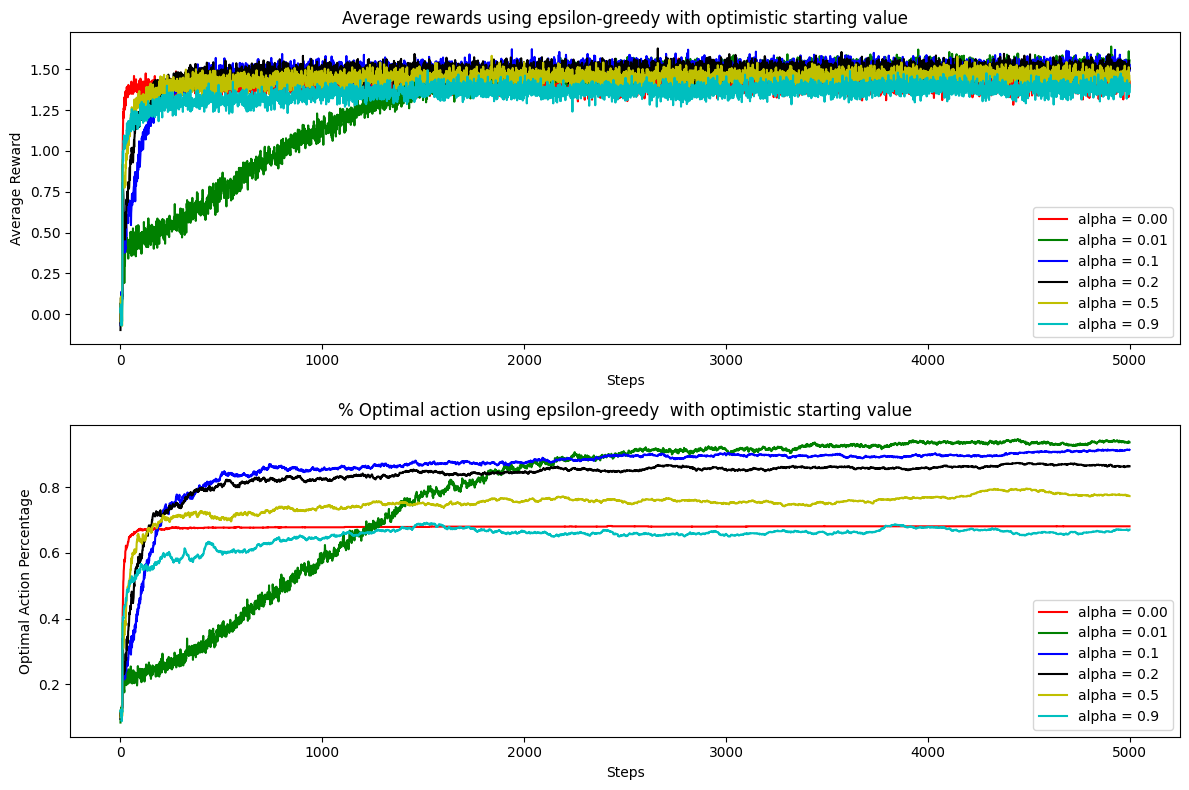

In [254]:
colors = ['r', 'g', 'b', 'k', 'y', 'c', 'm']
alpha_list = [0.0,0.01,0.1,0.2,0.5,0.9]
# alpha_list = [0.0,0.01,0.1,0.2,0.5,0.9]

chosen_initial_Q = 3
labels = ['alpha = 0.00', 'alpha = 0.01','alpha = 0.1', 'alpha = 0.2','alpha = 0.5','alpha = 0.9']
plt.figure(figsize=(12, 8))

# Plot the average rewards and optimal action percentages
for index, alpha in enumerate(alpha_list):
    avg_reward,optimal_percentages = greedy_algorithm(k_arm=10,epsilon=0,steps=STEP2,initial_value=chosen_initial_Q ,bandit_problems=1000,alpha=alpha)
 
    
    # Plot average rewards
    plt.subplot(2, 1, 1)
    plt.title("Average rewards using epsilon-greedy with optimistic starting value")
    plt.plot(np.arange(STEP2), avg_reward, label=labels[index], color=colors[index])
    plt.xlabel('Steps')
    plt.ylabel('Average Reward',size = 'medium')
    plt.legend(loc='lower right')

    
    # Plot optimal action percentages
    plt.subplot(2, 1, 2)
    plt.title("% Optimal action using epsilon-greedy  with optimistic starting value")

    plt.plot(np.arange(STEP2), optimal_percentages, label=labels[index], color=colors[index])
    plt.xlabel('Steps')
    plt.ylabel('Optimal Action Percentage',size='medium')
    plt.legend(loc='lower right')
    avg_reward_over_time = np.average(avg_reward)
    print(f'Average reward over time for alpha = {alpha}: {avg_reward_over_time}')
    optimal_percentages_over_time = np.average(optimal_percentages)
    print(f'Optimal Percentage over time for alpha = {alpha}: {optimal_percentages_over_time*100} %')
    print("--------------------------------------\n")
    
    

plt.tight_layout()
plt.show()


### Compare between greedy algorithm in case of optimistic initial value and non-optimistic initial value when epsilon = 0.1 and initial value = 3.0

Average reward WITH optimistic initial value = 2: 1.391389129492588
Average reward NO optimistic initial value = 2 : 1.0461393884260324
Optimal Percentage WITH optimistic initial value = 2 : 67.77750000000002 %
Optimal Percentage NO optimistic initial value = 2  : 37.01150000000001 %
--------------------------------------



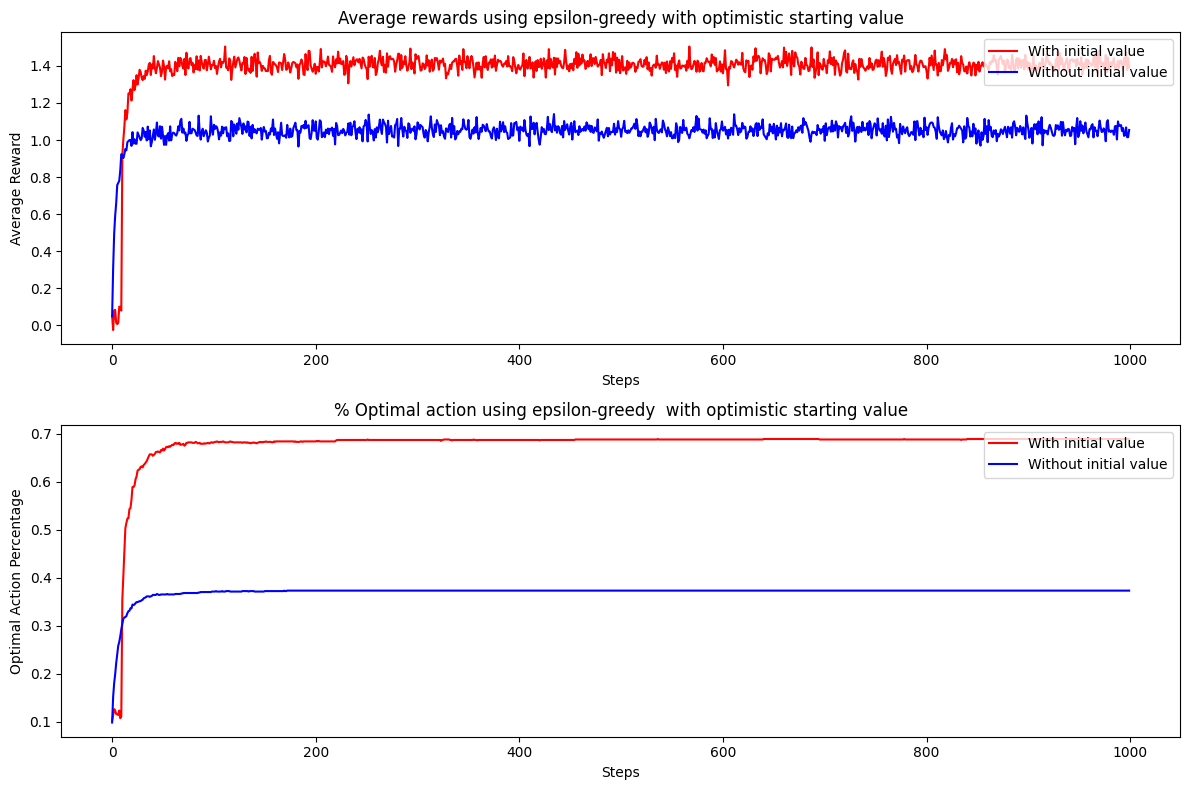

In [248]:
# avg_reward_p1,optimal_percentages_p1 = greedy_algorithm(k_arm = K_ARM, epsilon= 0.0, steps=STEP1, initial_value =0 ,alpha=0,bandit_problems =BANDIT_PROBLEMS)
avg_reward_ops,optimal_percentages_ops = greedy_algorithm(k_arm=10,epsilon=0.0,steps=STEP1,initial_value=chosen_initial_Q,bandit_problems=BANDIT_PROBLEMS,alpha=0.0)
avg_reward_noops,optimal_percentages_noops= greedy_algorithm(k_arm=10,epsilon=0.0,steps=STEP1,initial_value=0,bandit_problems=BANDIT_PROBLEMS,alpha=0.0)
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
plt.title("Average rewards using epsilon-greedy with optimistic starting value")
plt.plot(np.arange(STEP1), avg_reward_ops, label='With initial value', color='red')
plt.plot(np.arange(STEP1), avg_reward_noops, label='Without initial value', color='blue')

plt.xlabel('Steps')
plt.ylabel('Average Reward',size = 'medium')
plt.legend(loc='upper right')

plt.subplot(2, 1, 2)
plt.title("% Optimal action using epsilon-greedy  with optimistic starting value")

plt.plot(np.arange(STEP1), optimal_percentages_ops, label='With initial value',color='red')
plt.plot(np.arange(STEP1), optimal_percentages_noops, label='Without initial value', color='blue')

plt.xlabel('Steps')
plt.ylabel('Optimal Action Percentage',size='medium')
plt.legend(loc='upper right')
plt.tight_layout()

avg_reward_over_time_ops, avg_reward_over_time_noops = np.average(avg_reward_ops), np.average(avg_reward_noops)
print(f'Average reward over time WITH optimistic initial value = {2}: {avg_reward_over_time_ops}')
print(f'Average reward over time  NO optimistic initial value = {2} : {avg_reward_over_time_noops}')

optimal_ot_ops,optimal_ot_noops = np.average(optimal_percentages_ops), np.average(optimal_percentages_noops)
print(f'Optimal Percentage over time WITH optimistic initial value = {2} : {optimal_ot_ops*100} %')
print(f'Optimal Percentage over time NO optimistic initial value = {2}  : {optimal_ot_noops *100} %')

print("--------------------------------------\n")


## Gradient bandit

#### In this section we run the Gradient bandit code with 6 different of alpha use [0.0, 0.01,0.05, 0.1,0.5, 0.9], then we print the average of rewards for 1000 bandit problems run with 1000 and 5000 steps. 

100%|██████████| 1000/1000 [02:54<00:00,  5.74it/s]


Alpha 0.01, with baseline:
  Average optimal action percentage: 28.3298
  Average rewards: 4.5672516101513905
Alpha 0.01, without baseline:
  Average optimal action percentage: 27.4845
  Average rewards: 4.570754011693692
Alpha 0.01, REAL value:
  Average rewards WITH BASELINE : 0.5672516101513905
  Average rewards WITHOUT BASELINE : 0.5707540116936922
-----------------------------------------
Alpha 0.1, with baseline:
  Average optimal action percentage: 72.60079999999999
  Average rewards: 5.3578033807068515
Alpha 0.1, without baseline:
  Average optimal action percentage: 42.14869999999999
  Average rewards: 5.09053996992928
Alpha 0.1, REAL value:
  Average rewards WITH BASELINE : 1.3578033807068515
  Average rewards WITHOUT BASELINE : 1.0905399699292797
-----------------------------------------
Alpha 0.5, with baseline:
  Average optimal action percentage: 56.4029
  Average rewards: 5.3063000746421025
Alpha 0.5, without baseline:
  Average optimal action percentage: 26.047700000000

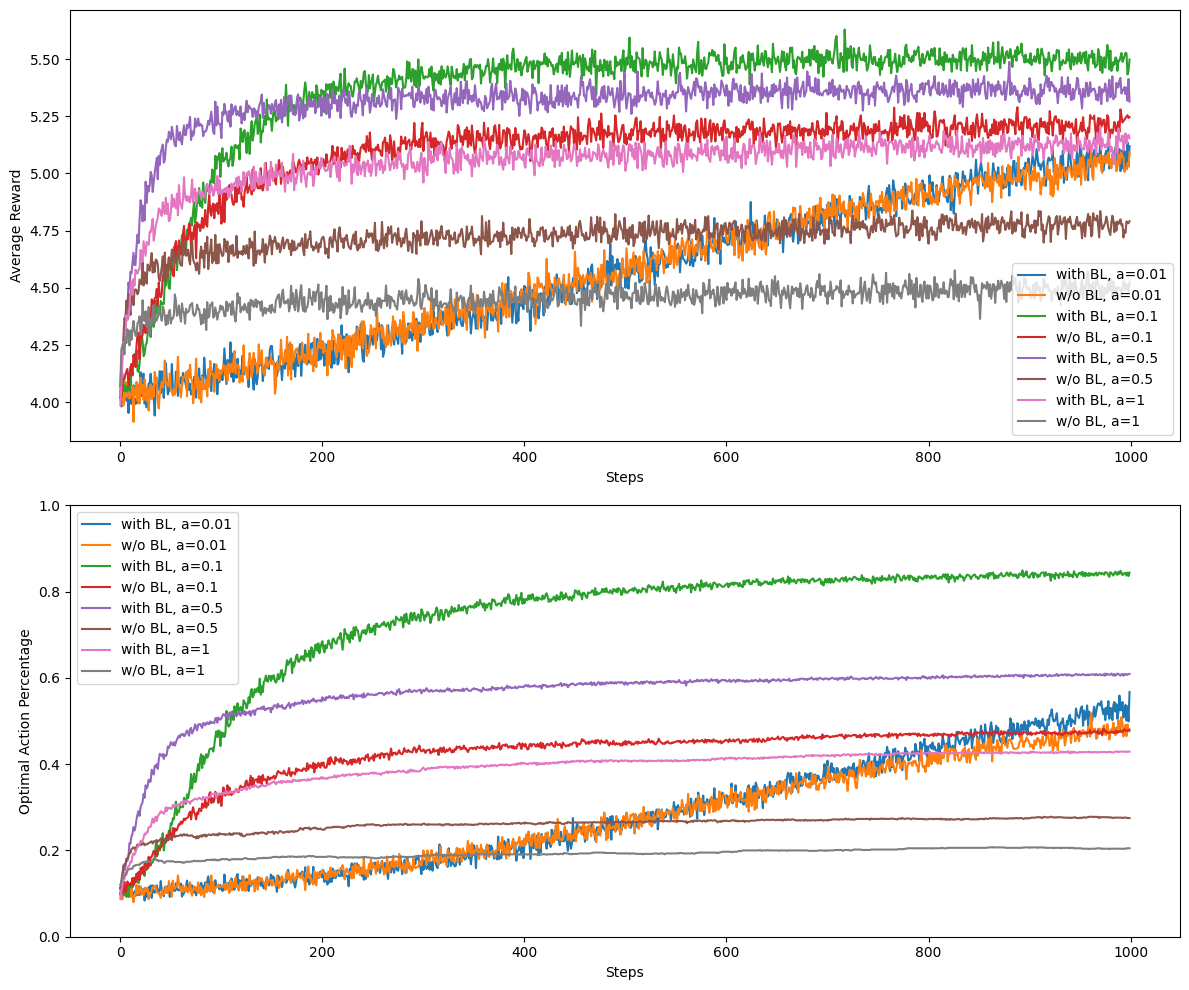

In [252]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

def initialize_bandit_env(size=10):
    """Initialize the 10-armed testbed environment."""
    means = 4+ np.random.randn(size) * 1.0
    return means

def bandit_step(means, action):
    """Simulate taking a step in the bandit environment."""
    return np.random.normal(loc=means[action])

def softmax(x):
    """Numerically stable softmax."""
    ex = np.exp(x - np.max(x))
    return ex / np.sum(ex)

def gradient_bandit(means, nb, alpha, with_baseline):
    """
    Runs the gradient bandit algorithm with a given number of steps and alpha.
    
    Parameters:
    means (array): The true action values.
    nb (int): Number of steps.
    alpha (float): Step size parameter.
    baseline (bool): Whether to use a baseline for the average reward.
    
    Returns:
    tuple: Updated preferences, action history - or optimal action, and reward history.
    """
    size = len(means)
    H_preference = np.zeros(size)  # Initialize action preferences
    baseline_reward = 0.0 
    action_count = 0.0 
    optimal_action = []
    rewards = []

    for index in range(nb):
        prob = softmax(H_preference) # Compute the action probabilities using softmax
        action = np.random.choice(range(size), p=prob) # Select an action based on the probabilities
        reward = bandit_step(means, action) # Get the reward for the selected action

        # Update the preferences
        H_new = H_preference - alpha * (reward - baseline_reward) * prob
        H_new[action] = H_preference[action] + alpha * (reward - baseline_reward) * (1 - prob[action])
        H_preference = H_new
        
        # Update the baseline reward if using a baseline
        if with_baseline == True: 
            action_count += 1
            baseline_reward += (reward - baseline_reward) / action_count
        optimal_action.append(action)
        rewards.append(reward)

    optimal_action = np.array(optimal_action)
    rewards = np.array(rewards)
    
    return H_preference, optimal_action, rewards

# Parameters
# nb_steps = 1000
# BANDIT_PROBLEMS = 1000
# size = 10
alphas = [0.01,0.1,0.5,1]

# alphas = [0.05, 0.1, 0.5, 1]
colors = ['r', 'g', 'b', 'k', 'y', 'c', 'm']

results = {}

for alpha in alphas:
    results[f'base_alpha_{alpha}_op'] = []
    results[f'base_alpha_{alpha}_re'] = []
    results[f'nobase_alpha_{alpha}_op'] = []
    results[f'nobase_alpha_{alpha}_re'] = []

for _ in tqdm(range(BANDIT_PROBLEMS)):
    means = initialize_bandit_env(K_ARM)
    max_A = np.argmax(means)
    
    for alpha in alphas:
        H, optimal_action, rewards = gradient_bandit(means, nb=STEP1, alpha=alpha, with_baseline=True)
        results[f'base_alpha_{alpha}_op'].append(optimal_action == max_A)
        results[f'base_alpha_{alpha}_re'].append(rewards)
        
        H, optimal_action, rewards = gradient_bandit(means, nb=STEP1, alpha=alpha,with_baseline=False)
        results[f'nobase_alpha_{alpha}_op'].append(optimal_action == max_A)
        results[f'nobase_alpha_{alpha}_re'].append(rewards)

# Convert to numpy arrays
for key in results:
    results[key] = np.array(results[key])

# Calculate averages
average_rewards = {}
optimal_action_percentages = {}

for alpha in alphas:
    average_rewards[f'base_alpha_{alpha}_re'] = np.average(results[f'base_alpha_{alpha}_re'], axis=0)
    average_rewards[f'nobase_alpha_{alpha}_re'] = np.average(results[f'nobase_alpha_{alpha}_re'], axis=0)
    
    optimal_action_percentages[f'base_alpha_{alpha}_op'] = np.average(results[f'base_alpha_{alpha}_op'], axis=0)
    optimal_action_percentages[f'nobase_alpha_{alpha}_op'] = np.average(results[f'nobase_alpha_{alpha}_op'], axis=0)

# Print average optimal action percentages and average rewards
for alpha in alphas:
    print(f"Alpha {alpha}, with baseline:")
    print(f"  Average optimal action percentage: {np.average(optimal_action_percentages[f'base_alpha_{alpha}_op'])*100}")
    print(f"  Average rewards: {np.average(average_rewards[f'base_alpha_{alpha}_re'])}")
    
    
    print(f"Alpha {alpha}, without baseline:")
    print(f"  Average optimal action over time  percentage: {np.average(optimal_action_percentages[f'nobase_alpha_{alpha}_op'])*100}")
    print(f"  Average rewards over time: {np.average(average_rewards[f'nobase_alpha_{alpha}_re'])}")

    print(f"Alpha {alpha}, REAL value:")
    print(f"  Average rewards over time WITH BASELINE : {np.average(average_rewards[f'base_alpha_{alpha}_re'])-4}")
    print(f"  Average rewards over time WITHOUT BASELINE : {np.average(average_rewards[f'nobase_alpha_{alpha}_re'])-4}")

    print("-----------------------------------------")


# Plot the results
fig, ax = plt.subplots(2, 1, figsize=(12, 10))

# Plot average rewards
for alpha in alphas:
    ax[0].plot(average_rewards[f'base_alpha_{alpha}_re'], label=f'with BL, a={alpha}')
    ax[0].plot(average_rewards[f'nobase_alpha_{alpha}_re'], label=f'w/o BL, a={alpha}')
    ax[0].set_xlabel('Steps')
    ax[0].set_ylabel('Average Reward')
    ax[0].legend()

# Plot optimal action percentages
for alpha in alphas:
# for index, alpha in enumerate(alphas):

    ax[1].plot(optimal_action_percentages[f'base_alpha_{alpha}_op'], label=f'with BL, a={alpha}')
    ax[1].plot(optimal_action_percentages[f'nobase_alpha_{alpha}_op'], label=f'w/o BL, a={alpha}')
    ax[1].set_xlabel('Steps')
    ax[1].set_ylabel('Optimal Action Percentage')
    ax[1].set_ylim((0.0, 1.0))
    ax[1].legend()

plt.tight_layout()
plt.show()


# Part 2

In [366]:
# BANDIT_PROBLEMS = 1000 
# STEP =10000 


def bandit_generator(k_arm =10):
    return np.random.normal(0,1,k_arm)

def return_reward(means): 
    return np.random.normal(means,1)

def nonstationary_changes(means, change_type):
    """Apply non-stationary changes to the means."""
    if change_type== "d":
        means += np.random.normal(0, 0.001, len(means))
    elif change_type == "m":
        means = 0.5 * means + np.random.normal(0, 0.01, len(means))
    elif change_type == "a":
        if np.random.rand() < 0.005:
            np.random.permutation(means)
    return means

def optimistic_greedy_algorithm(k_arm, steps, initial_value, bandit_problems, alpha, change_type):
    rewards = np.zeros((bandit_problems, steps))
     

    for i in range(bandit_problems):
        np.random.seed(i)
        Q = np.ones(k_arm) * initial_value
        N = np.zeros(k_arm)
        # means = np.random.normal(0, 1, k_arm)
        means = bandit_generator(k_arm=10)

        for step in range(steps):
            selected_action = np.argmax(Q)
            reward = return_reward(means[selected_action])
            N[selected_action]+=1
            # reward = np.random.normal(means[selected_action], 1)
            if alpha > 0:
            # alpha = initial_alpha / (N[selected_action] + 1)
                Q[selected_action] += alpha * (reward - Q[selected_action])
            else: 
                Q[selected_action] += (reward - Q[selected_action]) / N[selected_action]
            # Q[selected_action] += (reward - Q[selected_action])/  N[selected_action]
            rewards[i, step] = reward
            means = nonstationary_changes(means, change_type)

    terminal_rewards = rewards[:, -1]
    return terminal_rewards
def epsilon_greedy_fixed(k_arm, steps, epsilon, alpha, bandit_problems, change_type):
    rewards = np.zeros((bandit_problems, steps))

    for i in range(bandit_problems):
        np.random.seed(i)
        Q = np.zeros(k_arm)
        means = bandit_generator(10)

        # means = np.random.normal(0, 1, k_arm)

        for step in range(steps):
            if np.random.rand() < epsilon:
                selected_action = np.random.randint(k_arm)
            else:
                selected_action = np.argmax(Q)
            reward = return_reward(means[selected_action])
            # reward = np.random.normal(means[selected_action], 1)
            Q[selected_action] += alpha * (reward - Q[selected_action])
            rewards[i, step] = reward
            means = nonstationary_changes(means, change_type)

    terminal_rewards = rewards[:, -1]
    return terminal_rewards
def epsilon_greedy_decreasing(k_arm, steps, epsilon, bandit_problems,initial_alpha, change_type):
    rewards = np.zeros((bandit_problems, steps))

    for i in range(bandit_problems):
        np.random.seed(i)
        Q = np.zeros(k_arm)
        N = np.zeros(k_arm)
        means = bandit_generator(10)

        for step in range(steps):
            if np.random.rand() < epsilon:
                selected_action = np.random.randint(k_arm)
            else:
                selected_action = np.argmax(Q)
            reward = return_reward(means[selected_action])
            # reward = np.random.normal(means[selected_action], 1)
            N[selected_action] += 1

            # Decreasing alpha over time
            alpha = initial_alpha / (1 + step/steps)
            if alpha > 0:
            # alpha = initial_alpha / (N[selected_action] + 1)
                Q[selected_action] += alpha * (reward - Q[selected_action])
            else: 
                Q[selected_action] += (reward - Q[selected_action]) / N[selected_action]

            # alpha = 1 / (N[selected_action] + 1)
            # Q[selected_action] += alpha * (reward - Q[selected_action])
            rewards[i, step] = reward
            means = nonstationary_changes(means, change_type)

    terminal_rewards = rewards[:, -1]
    return terminal_rewards


BANDIT_PROBLEMS_RUN = 1000 
STEP_P2 = 10000



## Optimistic greedy

### Pilot run to compare different optimistic initial value: 

In [367]:
# INIT_VALUES = [1, 1.5,2.0,2.5,3.0,5.0]  # Different initial values for optimistic initialization
INIT_VALUES= [1,2,3,4,5]

CHANGE_TYPES = ["d", "m", "a"]
STEPS_P2 = 10000
TRIAL = 100
STEP_SIZES = [0.001,0.005, 0.01, 0.1,0.5]

results_pilot_ops = {}
for alpha in STEP_SIZES:
    for init_value in INIT_VALUES:
        for change_type in CHANGE_TYPES:
            key_new = f"init_value - {init_value} - alpha - {alpha}, change - {change_type}"
            results_pilot_ops[key_new] = optimistic_greedy_algorithm(k_arm=10, steps=STEPS_P2, initial_value=init_value , bandit_problems=TRIAL, alpha=alpha,change_type =change_type)
for alpha in STEP_SIZES:
    for init_value in INIT_VALUES:
        for change_type in CHANGE_TYPES:
            key_new = f"init_value - {init_value} - alpha - {alpha}, change - {change_type}"
            print(f"Mean terminal distribution {change_type} with init values - {init_value} - alpha {alpha}: {np.mean(results_pilot_ops [key_new])}")
        print('-------------------------')

Mean terminal distribution d with init values - 1 - alpha 0.001: 1.4853948424295353
Mean terminal distribution m with init values - 1 - alpha 0.001: 0.05653935807020244
Mean terminal distribution a with init values - 1 - alpha 0.001: 1.5734149894243528
-------------------------
Mean terminal distribution d with init values - 2 - alpha 0.001: 1.4873480735780509
Mean terminal distribution m with init values - 2 - alpha 0.001: 0.05401763319059576
Mean terminal distribution a with init values - 2 - alpha 0.001: 1.5642092343538405
-------------------------
Mean terminal distribution d with init values - 3 - alpha 0.001: 1.284523807710541
Mean terminal distribution m with init values - 3 - alpha 0.001: 0.057967325331465834
Mean terminal distribution a with init values - 3 - alpha 0.001: 1.4009424697350013
-------------------------
Mean terminal distribution d with init values - 4 - alpha 0.001: 0.9181577865206718
Mean terminal distribution m with init values - 4 - alpha 0.001: 0.056477127928

### Real run with 1000 bandit problems 

In [401]:
optimistic_initial_value = 3.0
ops_greedy_drift  = optimistic_greedy_algorithm(k_arm=10, steps=10000, initial_value=optimistic_initial_value , bandit_problems=1000, alpha= 0.01, change_type ='d')
ops_greedy_mean_reverting =  optimistic_greedy_algorithm(k_arm=10, steps=10000, initial_value=optimistic_initial_value , bandit_problems=1000,alpha= 0.01, change_type ='m')
ops_greedy_abrupt =  optimistic_greedy_algorithm(k_arm=10, steps=10000, initial_value=optimistic_initial_value , bandit_problems=1000,alpha= 0.01, change_type ='a' )

In [403]:
print(f"Mean terminal reward (Optimistic Greedy, Drift): {np.mean(ops_greedy_drift)}")
print(f"Mean terminal reward (Optimistic Greedy, Mean-Reverting): {np.mean(ops_greedy_mean_reverting)}")
print(f"Mean terminal reward (Optimistic Greedy, Abrupt): {np.mean(ops_greedy_abrupt)}")

Mean terminal reward (Optimistic Greedy, Drift): 1.527181573392017
Mean terminal reward (Optimistic Greedy, Mean-Reverting): -0.02027475781057311
Mean terminal reward (Optimistic Greedy, Abrupt): 1.5953572097837654


Text(0.5, 1.0, 'Optimistic greedy method with non-stationary changes applied')

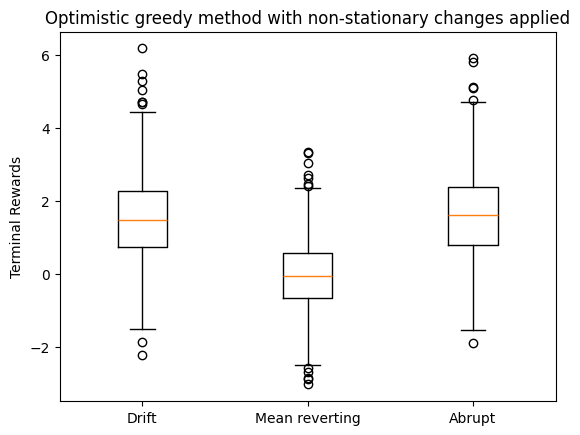

In [404]:
plt.boxplot([ops_greedy_drift, ops_greedy_mean_reverting , ops_greedy_abrupt  ],
            labels=["Drift", "Mean reverting", "Abrupt"])


plt.ylabel("Terminal Rewards")
plt.title("Optimistic greedy method with non-stationary changes applied")

### Run with base alpha = 0

In [391]:
ops_greedy_drift_b  = optimistic_greedy_algorithm(k_arm=10, steps=10000, initial_value=optimistic_initial_value , bandit_problems=1000, alpha= 0.0, change_type ='d')
ops_greedy_mean_reverting_b =  optimistic_greedy_algorithm(k_arm=10, steps=10000, initial_value=optimistic_initial_value , bandit_problems=1000,alpha= 0.0, change_type ='m')
ops_greedy_abrupt_b =  optimistic_greedy_algorithm(k_arm=10, steps=10000, initial_value=optimistic_initial_value , bandit_problems=1000,alpha= 0.0, change_type ='a' )

In [402]:
print(f"Mean terminal reward (Optimistic Greedy, Drift): {np.mean(ops_greedy_drift_b)}")
print(f"Mean terminal reward (Optimistic Greedy, Mean-Reverting): {np.mean(ops_greedy_mean_reverting_b)}")
print(f"Mean terminal reward (Optimistic Greedy, Abrupt): {np.mean(ops_greedy_abrupt_b)}")

Mean terminal reward (Optimistic Greedy, Drift): 1.4081461938984807
Mean terminal reward (Optimistic Greedy, Mean-Reverting): -0.019606950999906548
Mean terminal reward (Optimistic Greedy, Abrupt): 1.4757711996358511


Text(0.5, 1.0, 'Optimistic greedy method with non-stationary changes applied')

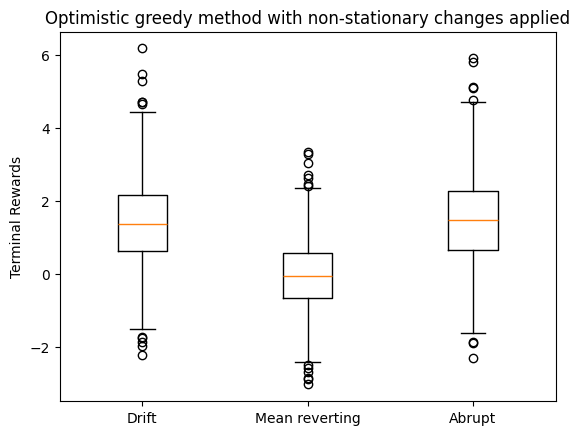

In [393]:
plt.boxplot([ops_greedy_drift_b, ops_greedy_mean_reverting_b , ops_greedy_abrupt_b  ],
            labels=["Drift", "Mean reverting", "Abrupt"])


plt.ylabel("Terminal Rewards")
plt.title("Optimistic greedy method with non-stationary changes applied")

## Fixed step size

##  Pilot run to compare the performance of different step size in fixed step size for optimistic initial value 

### Pilot run 100 problems

In [372]:
EPSILON_VALUES = [0.01, 0.05,  0.1, 0.2]
STEP_SIZES = [0.001,0.005, 0.01, 0.1]
CHANGE_TYPES = ["d", "m", "a"]
results_pilot = {}
STEPS = 10000
for alpha in STEP_SIZES:
    for epsilon in EPSILON_VALUES:
        for change_type in CHANGE_TYPES:
            key_new = f"alpha - {alpha}, epsilon - {epsilon}, change - {change_type}"
            results_pilot[key_new] = epsilon_greedy_fixed(k_arm=10, steps=10000, epsilon=epsilon, alpha=alpha, bandit_problems=100, change_type=change_type)

# Printing the mean terminal distribution for each combination
for alpha in STEP_SIZES:
    for epsilon in EPSILON_VALUES:
        for change_type in CHANGE_TYPES:
            key_new = f"alpha - {alpha}, epsilon - {epsilon}, change - {change_type}"
            print(f"Mean terminal distribution {change_type} with alpha - {alpha}, epsilon - {epsilon}: {np.mean(results_pilot[key_new])}")
    print('-----------------------------------------------------')

Mean terminal distribution d with alpha - 0.001, epsilon - 0.01: 1.1472192178134313
Mean terminal distribution m with alpha - 0.001, epsilon - 0.01: 0.05330349319607522
Mean terminal distribution a with alpha - 0.001, epsilon - 0.01: 1.1659614686614344
Mean terminal distribution d with alpha - 0.001, epsilon - 0.05: 1.019672353806684
Mean terminal distribution m with alpha - 0.001, epsilon - 0.05: -0.016082988433831175
Mean terminal distribution a with alpha - 0.001, epsilon - 0.05: 1.1127302358559374
Mean terminal distribution d with alpha - 0.001, epsilon - 0.1: 1.0548201520534215
Mean terminal distribution m with alpha - 0.001, epsilon - 0.1: 0.14086763004130554
Mean terminal distribution a with alpha - 0.001, epsilon - 0.1: 0.9363190998859973
Mean terminal distribution d with alpha - 0.001, epsilon - 0.2: 0.9900828803747921
Mean terminal distribution m with alpha - 0.001, epsilon - 0.2: 0.03933561196780398
Mean terminal distribution a with alpha - 0.001, epsilon - 0.2: 0.7862372364

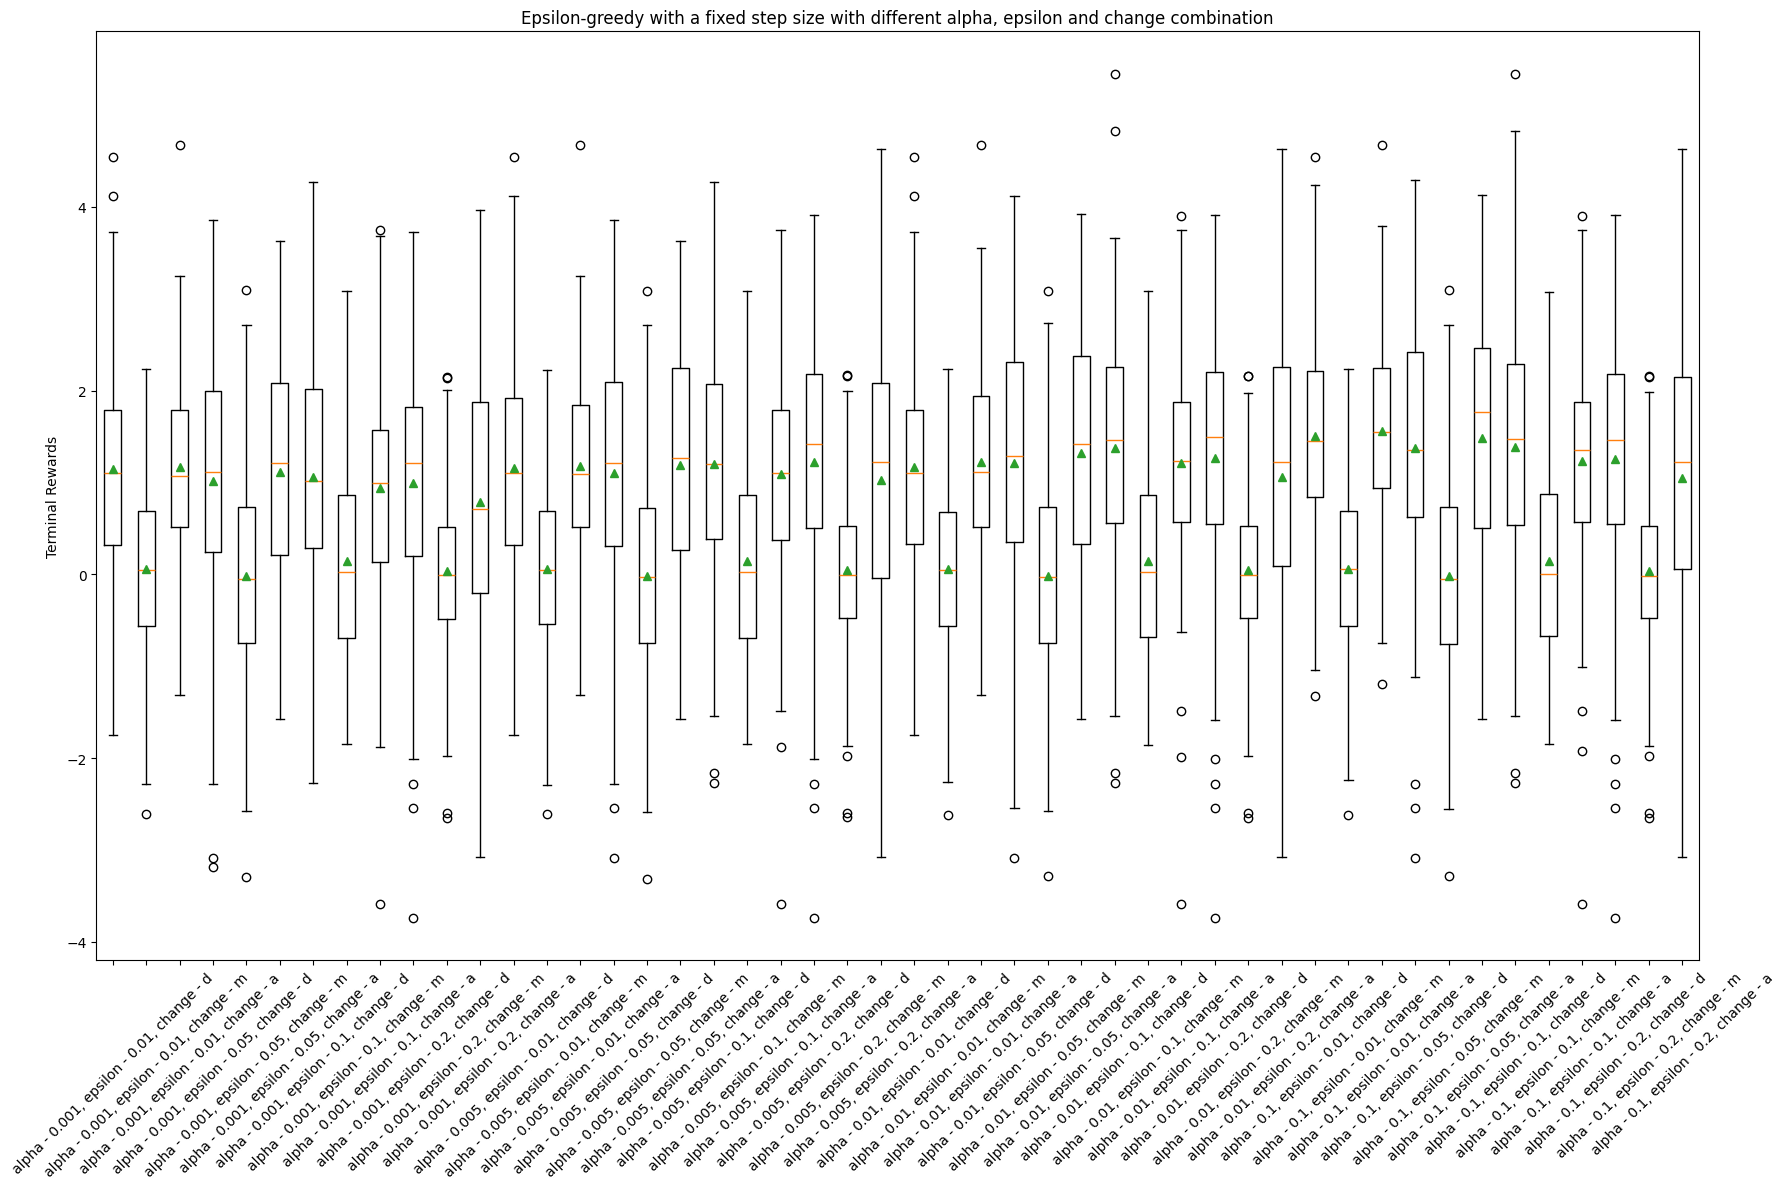

In [380]:
plt.figure(figsize=(18, 12))
plt.title("Epsilon-greedy with a fixed step size with different alpha, epsilon and change combination")
plt.boxplot([results_pilot [key_new] for key_new in results_pilot], labels=[key for key in results_pilot ],showmeans=True)
plt.ylabel("Terminal Rewards")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [405]:
eps_greedy_drift = epsilon_greedy_fixed(k_arm=10, steps=10000, epsilon=0.01, alpha=0.1, bandit_problems=1000, change_type='d')
eps_greedy_mean_reverting = epsilon_greedy_fixed(k_arm=10, steps=10000, epsilon=0.01, alpha=0.1, bandit_problems=1000, change_type='m')
eps_greedy_abrupt= epsilon_greedy_fixed(k_arm=10, steps=10000, epsilon=0.1, alpha=0.01, bandit_problems=1000, change_type='a')
                                                            

In [406]:
print(f"Mean terminal reward (Epsilon-Greedy Fixed, Drift): {np.mean(eps_greedy_drift )}")
print(f"Mean terminal reward (Epsilon-Greedy Fixed, Mean-Reverting): {np.mean(eps_greedy_mean_reverting)}")
print(f"Mean terminal reward (Epsilon-Greedy Fixed, Abrupt): {np.mean(eps_greedy_abrupt)}")


Mean terminal reward (Epsilon-Greedy Fixed, Drift): 1.5930651498055672
Mean terminal reward (Epsilon-Greedy Fixed, Mean-Reverting): 0.07404883623866335
Mean terminal reward (Epsilon-Greedy Fixed, Abrupt): 1.393461707392447


Text(0.5, 1.0, 'Epsilon-greedy with a fixed step size with non-stationary changes applied')

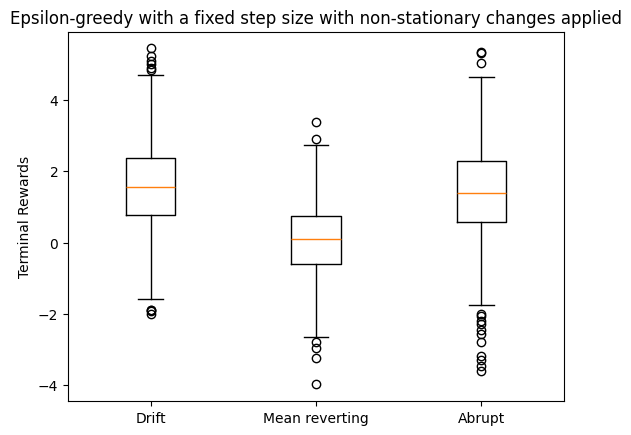

In [407]:
plt.boxplot([eps_greedy_drift,eps_greedy_mean_reverting , eps_greedy_abrupt ],
            labels=["Drift", "Mean reverting", "Abrupt"])


plt.ylabel("Terminal Rewards")
plt.title("Epsilon-greedy with a fixed step size with non-stationary changes applied")

## Decreasing step size: 

In [344]:
EPSILON_VALUES = [0.01, 0.05,  0.1, 0.2]
STEP_SIZES = [0.001,0.005, 0.01, 0.1]
CHANGE_TYPES = ["d", "m", "a"]
results_pilot_des = {}
STEPS = 10000
for alpha in STEP_SIZES:
    for epsilon in EPSILON_VALUES:
        for change_type in CHANGE_TYPES:
            key_new = f"alpha - {alpha}, epsilon - {epsilon}, change - {change_type}"
            results_pilot_des[key_new] = epsilon_greedy_decreasing(k_arm=10, steps=10000, epsilon=epsilon, bandit_problems=100 ,initial_alpha=alpha,change_type=change_type)

# Printing the mean terminal distribution for each combination
for alpha in STEP_SIZES:
    for epsilon in EPSILON_VALUES:
        for change_type in CHANGE_TYPES:
            key_new = f"alpha - {alpha}, epsilon - {epsilon}, change - {change_type}"
            print(f"Mean terminal distribution {change_type} with alpha - {alpha}, epsilon - {epsilon}: {np.mean(results_pilot_des[key_new])}")

Mean terminal distribution d with alpha - 0.001, epsilon - 0.01: 1.19422170077383
Mean terminal distribution m with alpha - 0.001, epsilon - 0.01: 0.12293386092339523
Mean terminal distribution a with alpha - 0.001, epsilon - 0.01: 1.082137097851387
Mean terminal distribution d with alpha - 0.001, epsilon - 0.05: 0.9747409302328002
Mean terminal distribution m with alpha - 0.001, epsilon - 0.05: -0.04662412985086513
Mean terminal distribution a with alpha - 0.001, epsilon - 0.05: 0.9006033927291536
Mean terminal distribution d with alpha - 0.001, epsilon - 0.1: 0.9049722636760775
Mean terminal distribution m with alpha - 0.001, epsilon - 0.1: -0.07387740368703354
Mean terminal distribution a with alpha - 0.001, epsilon - 0.1: 1.0038048098847923
Mean terminal distribution d with alpha - 0.001, epsilon - 0.2: 0.9666851449538898
Mean terminal distribution m with alpha - 0.001, epsilon - 0.2: -0.014792868652900257
Mean terminal distribution a with alpha - 0.001, epsilon - 0.2: 0.7210565089

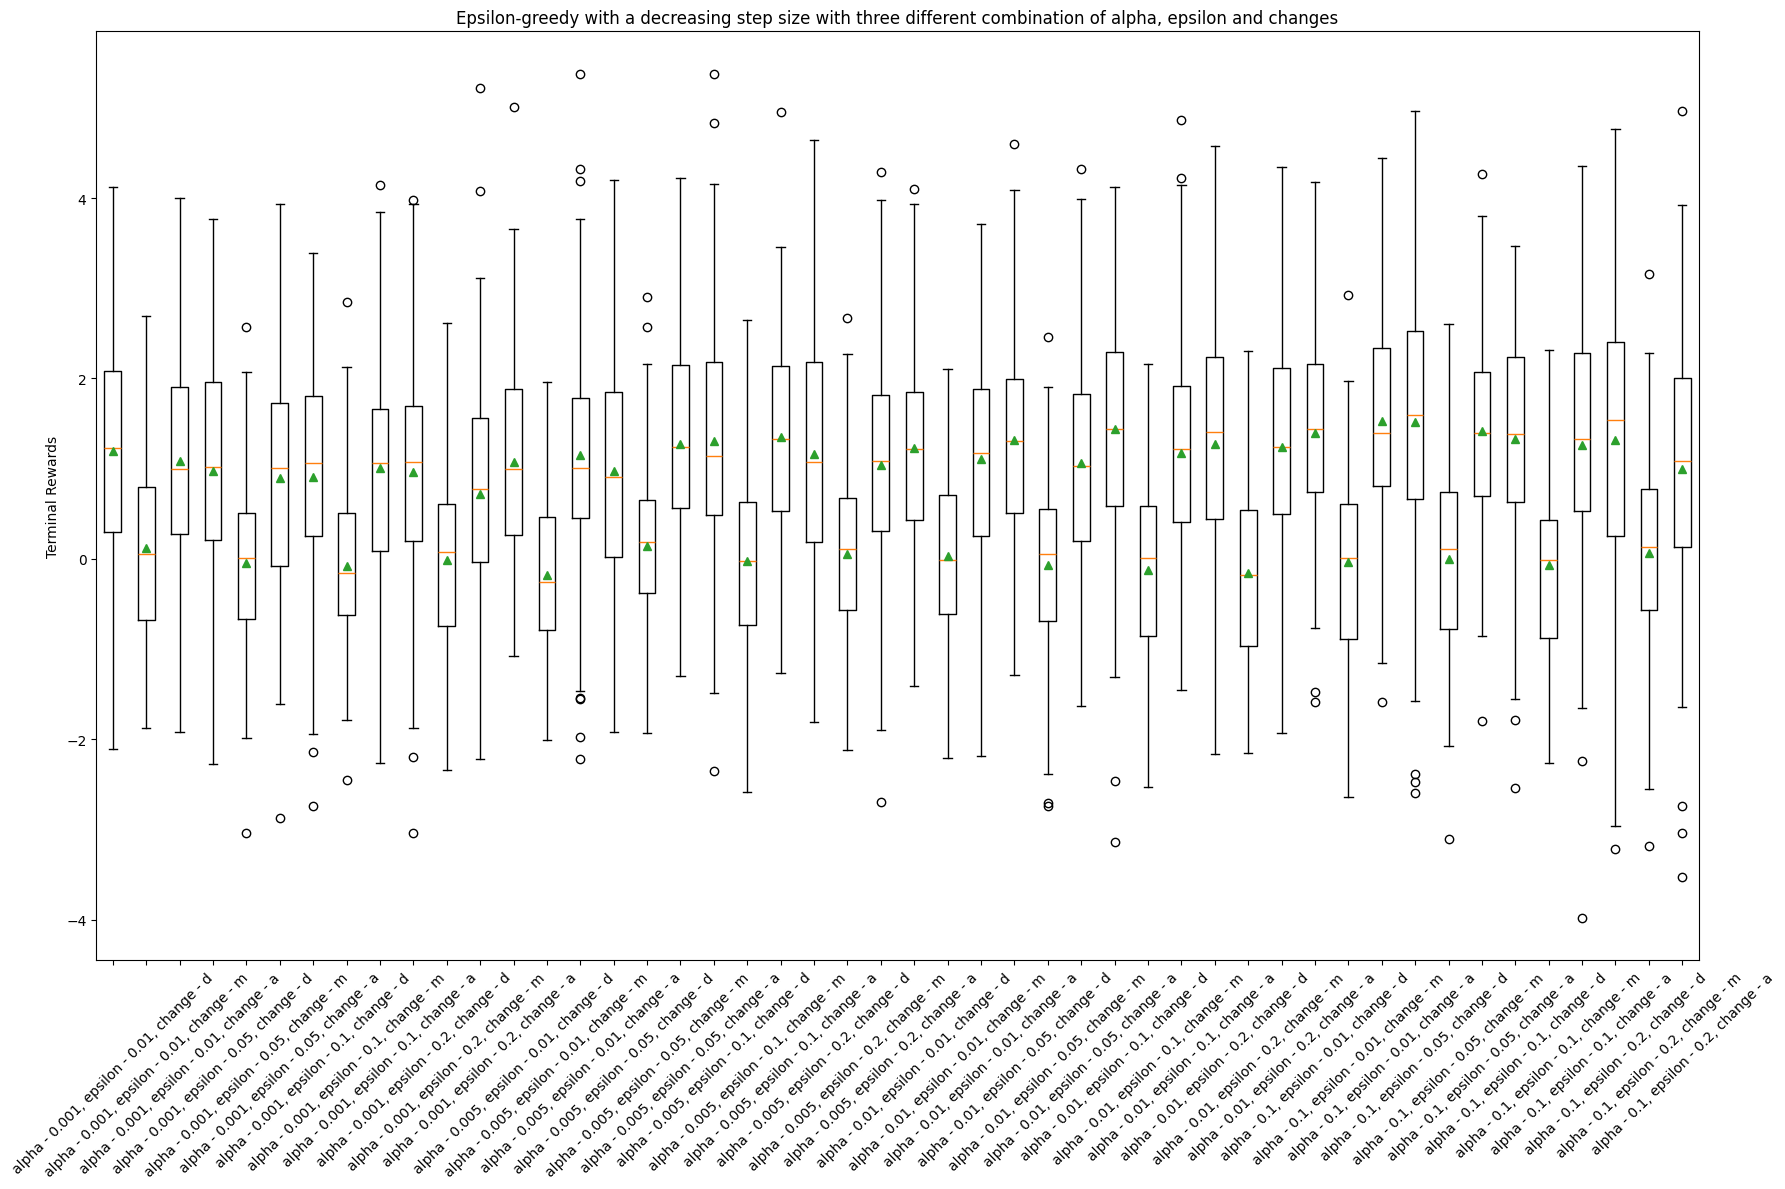

In [383]:
plt.figure(figsize=(18, 12))
plt.title("Epsilon-greedy with a decreasing step size with three different combination of alpha, epsilon and changes")
plt.boxplot([results_pilot_des[key_decreasing] for key_decreasing in results_pilot_des], labels=[key_decreasing for key_decreasing in results_pilot_des],showmeans=True)
plt.ylabel("Terminal Rewards")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

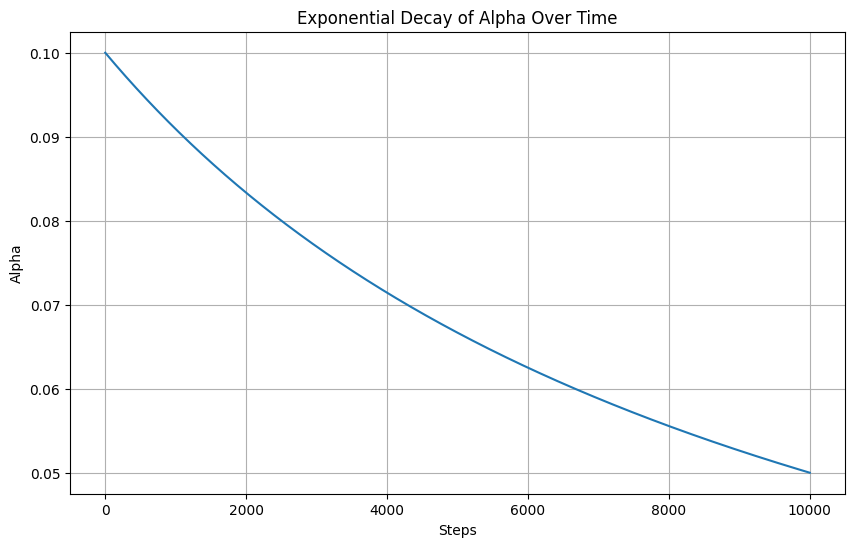

In [349]:
import numpy as np
import matplotlib.pyplot as plt

# Function to generate decreasing alpha values over time
def generate_decreasing_alpha(initial_alpha, steps):
    alpha_values = np.zeros(steps)
    for step in range(steps):
        alpha = initial_alpha / (1 + step / steps)  # Exponential decay of alpha
        alpha_values[step] = alpha
    return alpha_values

# Constants
STEPS = 10000
INITIAL_ALPHA = 0.1

# Generate alpha values
alpha_values = generate_decreasing_alpha(INITIAL_ALPHA, STEPS)

# Plot alpha values
plt.figure(figsize=(10, 6))
plt.plot(alpha_values)
plt.xlabel("Steps")
plt.ylabel("Alpha")
plt.title("Exponential Decay of Alpha Over Time")
plt.grid(True)
plt.show()



In [377]:
eps_greedy_des_drift1 =  epsilon_greedy_decreasing(k_arm=10, steps=10000, epsilon=0.05, bandit_problems=1000 ,initial_alpha=0.1,change_type='d')
eps_greedy_des_mean_reverting1 =  epsilon_greedy_decreasing(k_arm=10, steps=10000, epsilon=0.05, bandit_problems=1000,initial_alpha=0.1, change_type='m')
eps_greedy_des_abrupt1 =  epsilon_greedy_decreasing(k_arm=10, steps=10000, epsilon=0.05, bandit_problems=1000, initial_alpha=0.1, change_type='a')


In [378]:
print(f"Mean terminal reward (Epsilon-Greedy Decreasing, Drift): {np.mean(eps_greedy_des_drift1)}")
print(f"Mean terminal reward (Epsilon-Greedy Decreasing, Mean-Reverting): {np.mean(eps_greedy_des_mean_reverting1)}")
print(f"Mean terminal reward (Epsilon-Greedy Decreasing, Abrupt): {np.mean(eps_greedy_des_abrupt1)}")

Mean terminal reward (Epsilon-Greedy Decreasing, Drift): 1.4632769667815837
Mean terminal reward (Epsilon-Greedy Decreasing, Mean-Reverting): 0.006151098403094323
Mean terminal reward (Epsilon-Greedy Decreasing, Abrupt): 1.4484751025448035


Text(0.5, 1.0, 'Epsilon-greedy with a decreasing step size with non-stationary changes applied')

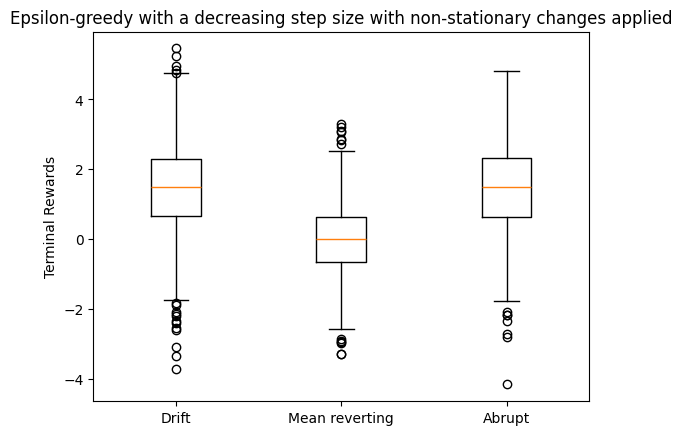

In [385]:
plt.boxplot([eps_greedy_des_drift1, eps_greedy_des_mean_reverting1,eps_greedy_des_abrupt1],
            labels=["Drift", "Mean reverting", "Abrupt"])


plt.ylabel("Terminal Rewards")
plt.title("Epsilon-greedy with a decreasing step size with non-stationary changes applied")

## Overview performance

## Drift change

Text(0.5, 1.0, 'Drift Change')

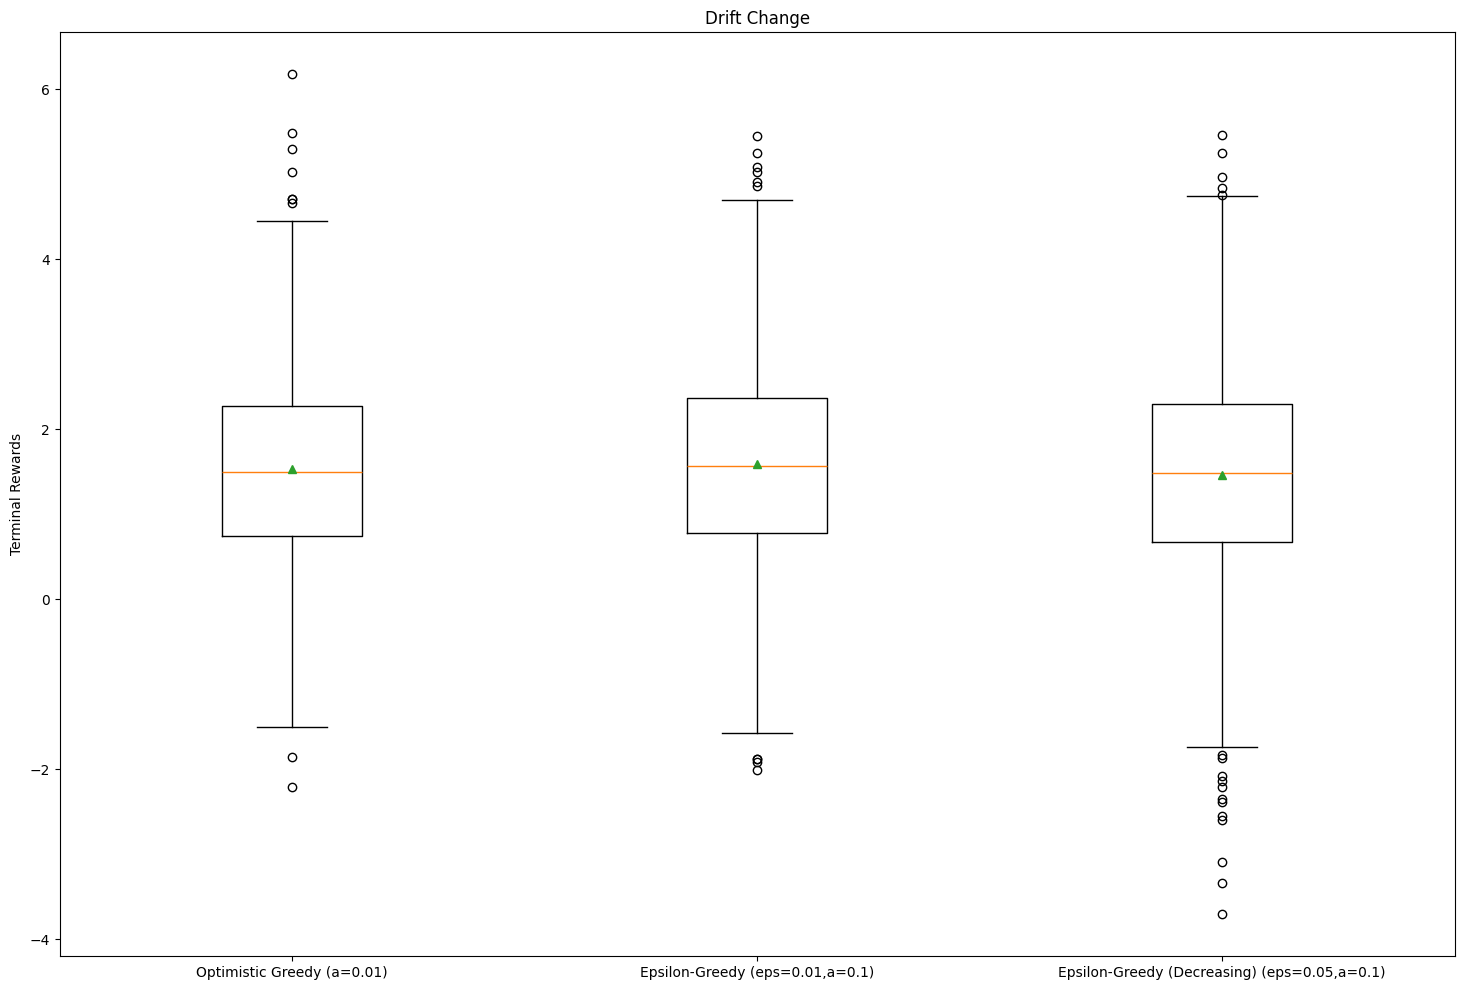

In [419]:
plt.figure(figsize=(18, 12))
plt.boxplot([ops_greedy_drift, eps_greedy_drift, eps_greedy_des_drift1 ],
            labels=["Optimistic Greedy (a=0.01)", "Epsilon-Greedy (eps=0.01,a=0.1)", "Epsilon-Greedy (Decreasing) (eps=0.05,a=0.1)"],showmeans=True)
plt.ylabel("Terminal Rewards")
plt.title("Drift Change")

## Mean Reverting

Text(0.5, 1.0, 'Mean-Reverting Change')

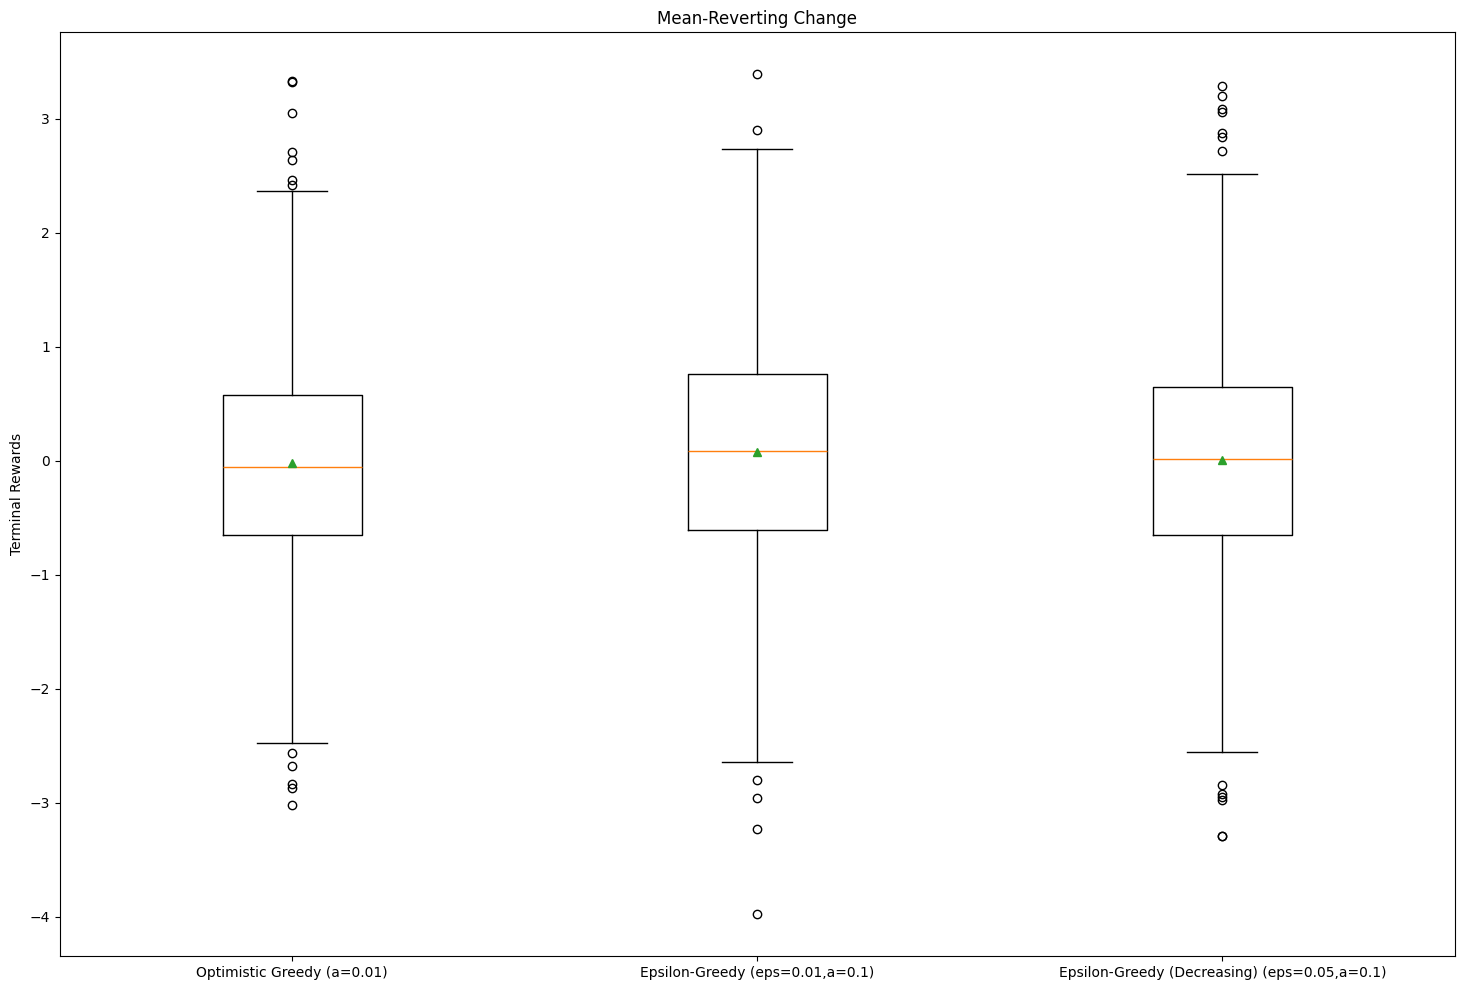

In [420]:
plt.figure(figsize=(18, 12))
plt.boxplot([ops_greedy_mean_reverting, eps_greedy_mean_reverting, eps_greedy_des_mean_reverting1],
            labels=["Optimistic Greedy (a=0.01)",  "Epsilon-Greedy (eps=0.01,a=0.1)", "Epsilon-Greedy (Decreasing) (eps=0.05,a=0.1)"],showmeans=True)
plt.ylabel("Terminal Rewards")
plt.title("Mean-Reverting Change")


Text(0.5, 1.0, 'Abrupt Change')

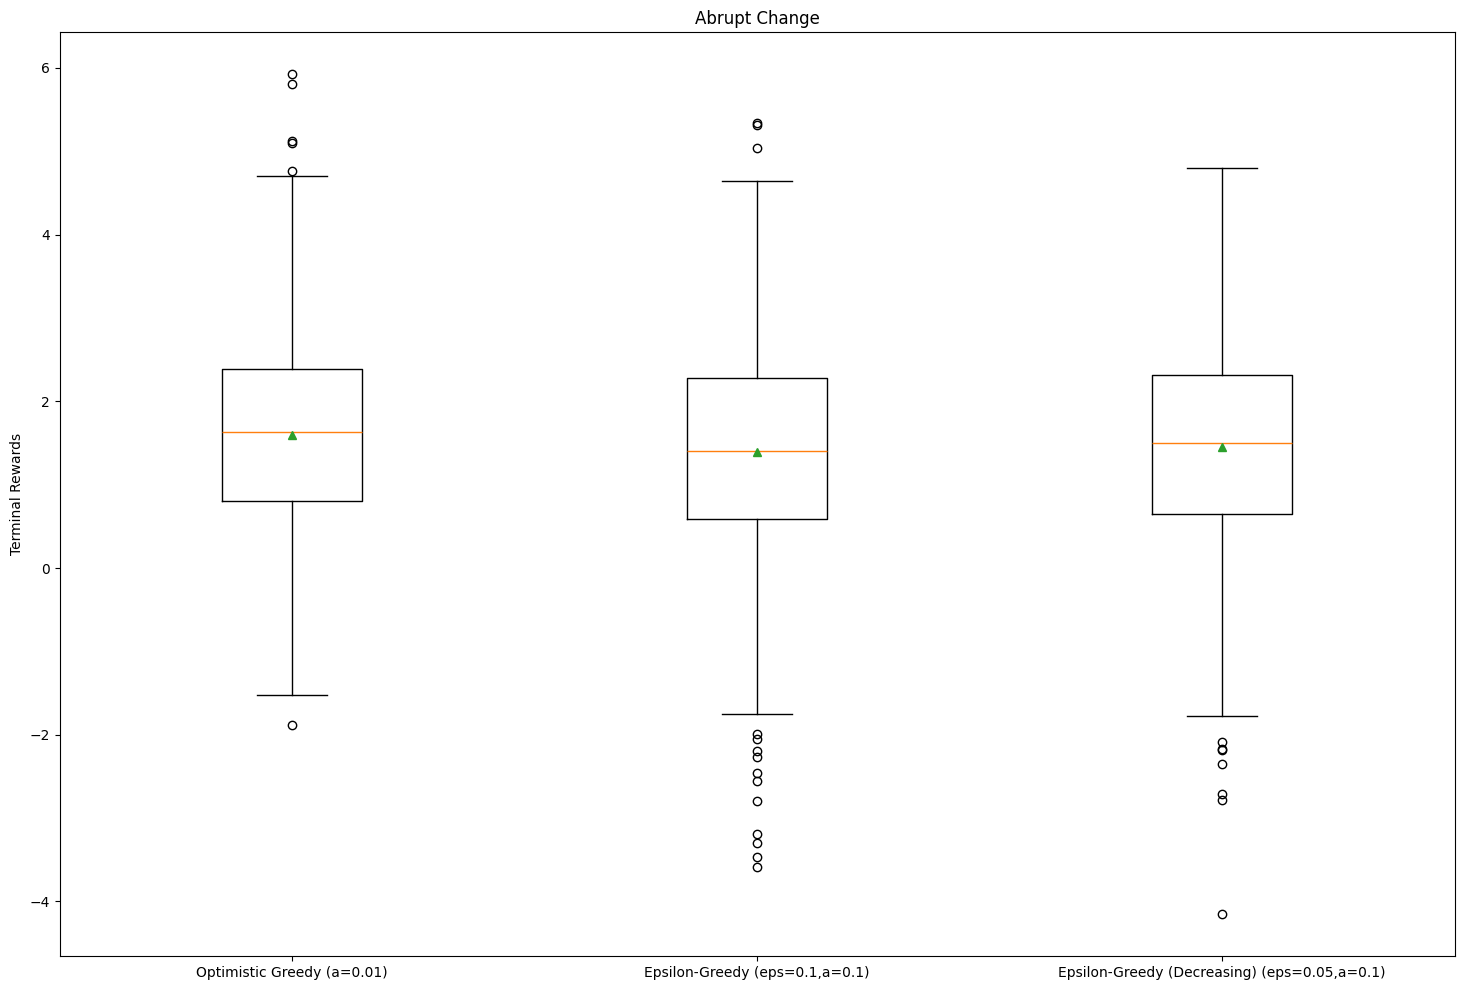

In [421]:
plt.figure(figsize=(18, 12))
plt.boxplot([ops_greedy_abrupt, eps_greedy_abrupt, eps_greedy_des_abrupt1],
            labels=["Optimistic Greedy (a=0.01)", "Epsilon-Greedy (eps=0.1,a=0.1)", "Epsilon-Greedy (Decreasing) (eps=0.05,a=0.1)"],showmeans=True)
plt.ylabel("Terminal Rewards")
plt.title("Abrupt Change")

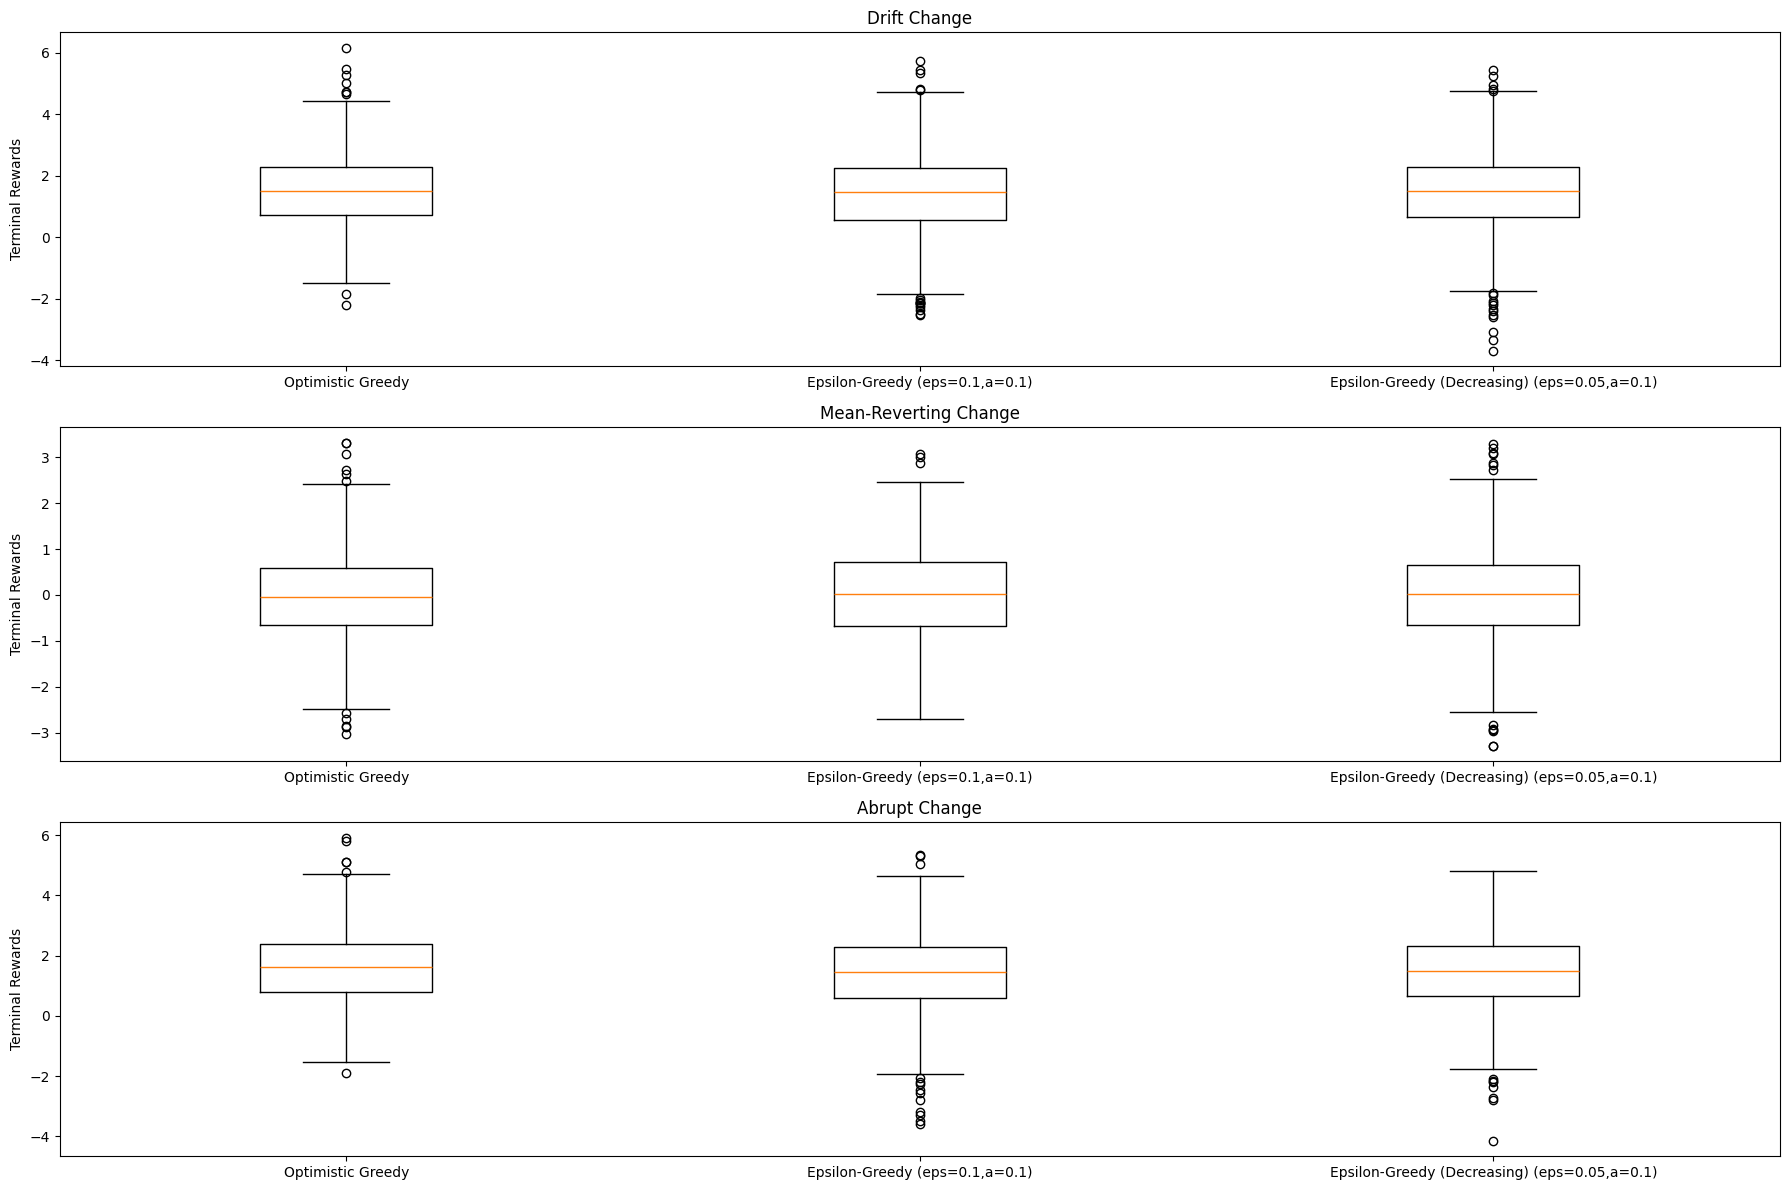

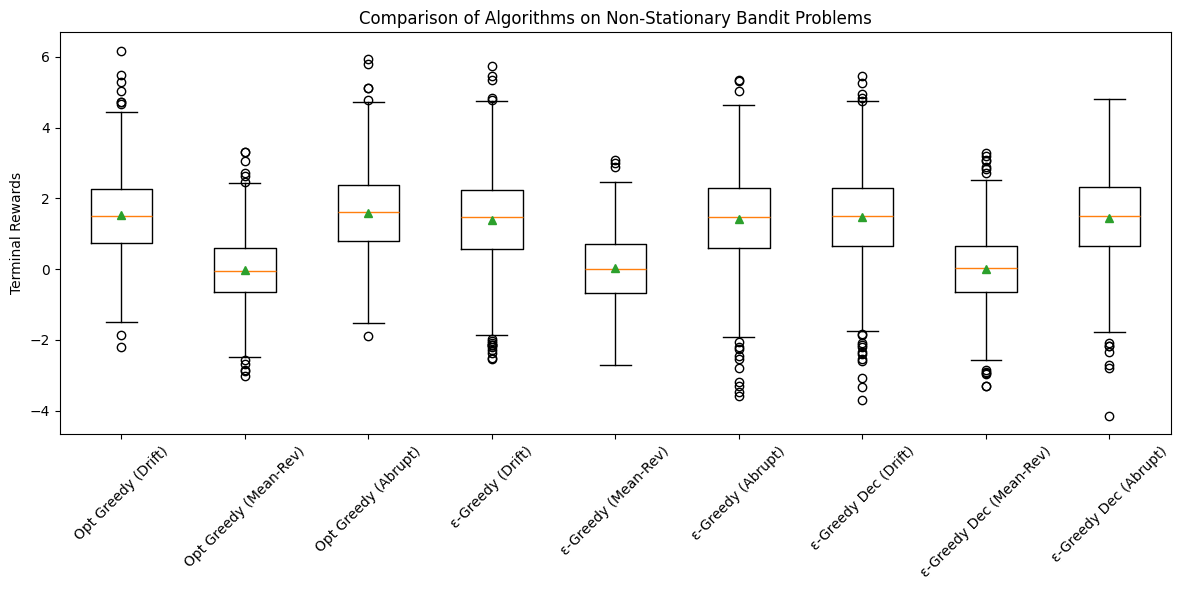

In [390]:
plt.figure(figsize=(18, 12))
plt.subplot(3, 1, 1)
plt.boxplot([ops_greedy_drift, eps_greedy_drift, eps_greedy_des_drift1 ],
            labels=["Optimistic Greedy", "Epsilon-Greedy (eps=0.1,a=0.1)", "Epsilon-Greedy (Decreasing) (eps=0.05,a=0.1)"])
plt.ylabel("Terminal Rewards")
plt.title("Drift Change")

# Mean-reverting change plots
plt.subplot(3, 1, 2)
plt.boxplot([ops_greedy_mean_reverting, eps_greedy_mean_reverting, eps_greedy_des_mean_reverting1],
            labels=["Optimistic Greedy",  "Epsilon-Greedy (eps=0.1,a=0.1)", "Epsilon-Greedy (Decreasing) (eps=0.05,a=0.1)"])
plt.ylabel("Terminal Rewards")
plt.title("Mean-Reverting Change")

# Abrupt change plots
plt.subplot(3, 1, 3)
plt.boxplot([ops_greedy_abrupt, eps_greedy_abrupt, eps_greedy_des_abrupt1],
            labels=["Optimistic Greedy", "Epsilon-Greedy (eps=0.1,a=0.1)", "Epsilon-Greedy (Decreasing) (eps=0.05,a=0.1)"])
plt.ylabel("Terminal Rewards")
plt.title("Abrupt Change")

plt.tight_layout()
plt.show()

# Combined plot
plt.figure(figsize=(12, 6))
# plt.boxplot([ops_greedy_drift, eps_greedy_drift, eps_greedy_des_drift1 ,
#              ops_greedy_mean_reverting, eps_greedy_mean_reverting, eps_greedy_des_mean_reverting1,
#              ops_greedy_abrupt, eps_greedy_abrupt, eps_greedy_des_abrupt1],
#             labels=["Opt Greedy (Drift)", "ε-Greedy (Drift)", "ε-Greedy Dec (Drift)",
#                     "Opt Greedy (Mean-Rev)", "ε-Greedy (Mean-Rev)", "ε-Greedy Dec (Mean-Rev)",
#                     "Opt Greedy (Abrupt)", "ε-Greedy (Abrupt)", "ε-Greedy Dec (Abrupt)"],showmeans=True)
plt.boxplot([ops_greedy_drift, ops_greedy_mean_reverting, ops_greedy_abrupt,
             eps_greedy_drift,eps_greedy_mean_reverting,eps_greedy_abrupt, eps_greedy_des_drift1 ,eps_greedy_des_mean_reverting1,  eps_greedy_des_abrupt1],
            labels=["Opt Greedy (Drift)","Opt Greedy (Mean-Rev)", "Opt Greedy (Abrupt)", "ε-Greedy (Drift)",
                    "ε-Greedy (Mean-Rev)", "ε-Greedy (Abrupt)", "ε-Greedy Dec (Drift)", "ε-Greedy Dec (Mean-Rev)",
                      "ε-Greedy Dec (Abrupt)"],showmeans=True)
plt.ylabel("Terminal Rewards")
plt.title("Comparison of Algorithms on Non-Stationary Bandit Problems")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()